# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.58 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('a7180674.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-05-25T00:38:52.371609Z   
1  2020-05-25T00:38:52.376912Z   
2  2020-05-25T00:38:52.382243Z   
3  2020-05-25T00:38:52.387541Z   
4  2020-05-25T00:38:52.392878Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 9998, 'deaths': 216, 'recovered'...   
1   {'confirmed': 989, 'deaths': 31, 'recovered': 0}   
2  {'confirmed': 8113, 'deaths': 592, 'recovered'...   
3   {'confirmed': 762, 'deaths': 51, 'recovered': 0}   
4     {'confirmed': 61, 'deaths': 4, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 9998, 'timeline': {'2...  
1  {'confirmed': {'latest': 989, 'timeline': {'20...  
2  {'confirmed': {'latest': 8113, 'timeline': {'2...  
3  {'confirmed': {'latest': 762, 'timeline': {'20...  
4  {'confirmed': {'latest': 61, 'timeline': {'202...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
118      11110     263       NaN                     0.288861   
119      11122     264       NaN                     0.108011   
120      11142     264       NaN                     0.179824   
121      11165     266       NaN                     0.206426   
122      11190     266       NaN                     0.223914   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
118                                         968.291949                 
119                                         362.063621                 
120                                         602.788292                 
121                                         691.962223                 
122                                         750.583451                 

     deaths_percentage_change  \
118                  0.380228   
119                  0.380228   
120                  0.380228   
121                  0.757576   
122                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
118                                        1274.564902           
119                                        1274.564902           
120                                        1274.564902           
121                                        2539.474008           
122                                                NaN           

     confirmed_new_cases  deaths_new_cases  
118                 32.0               1.0  
119                 12.0               1.0  
120                 20.0               1.0  
121                 23.0               2.0  
122                 25.0               NaN

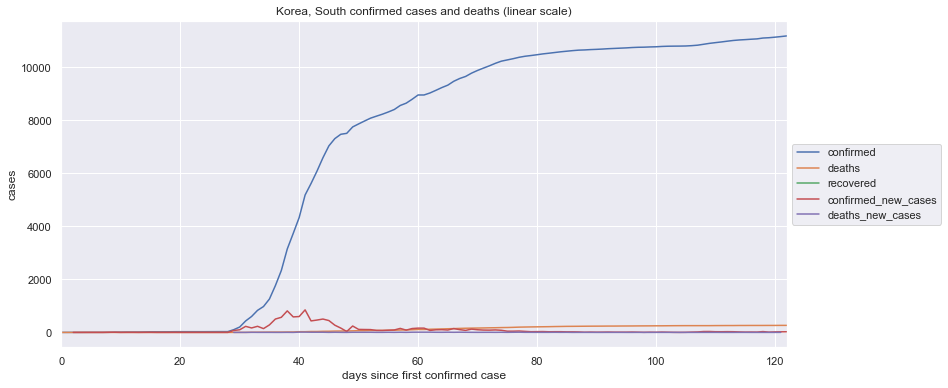

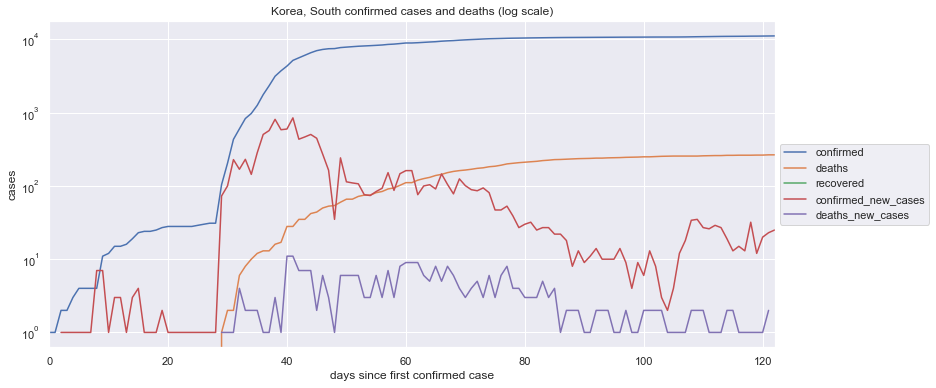

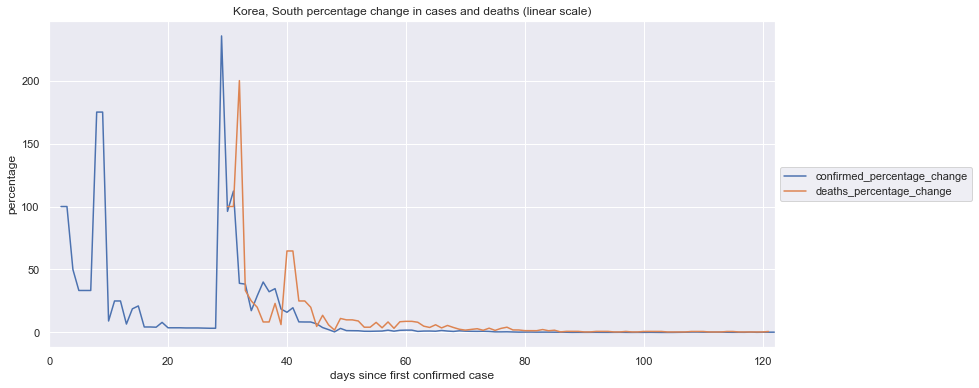

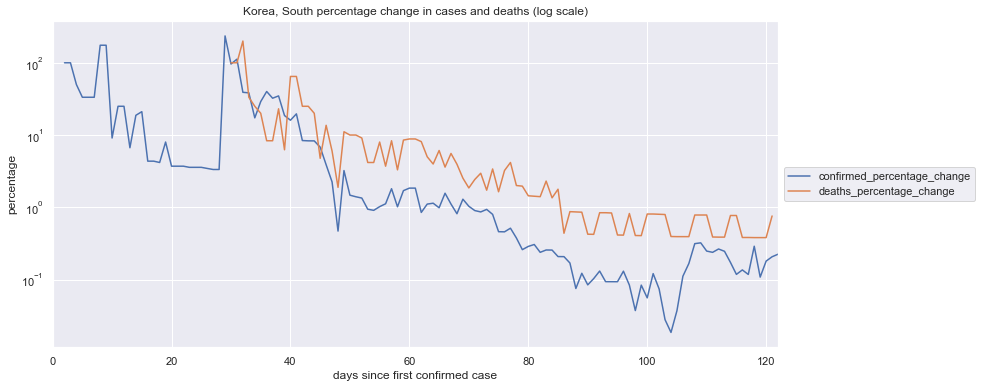

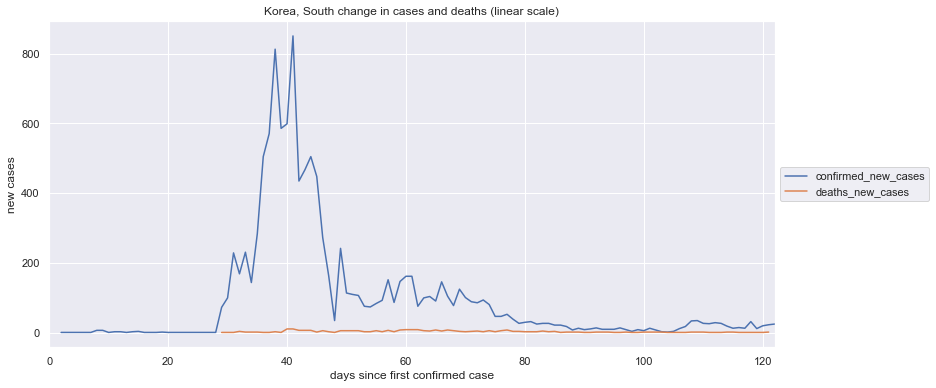

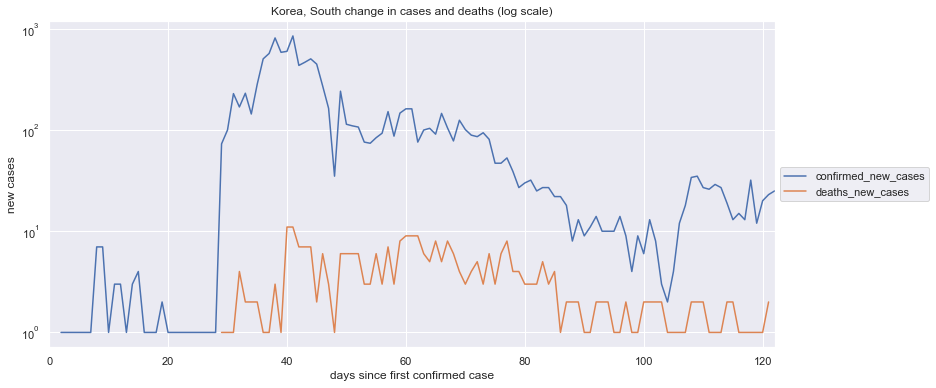

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
105      55791    9108       NaN                     0.417574   
106      55983    9150       NaN                     0.344142   
107      56235    9186       NaN                     0.450137   
108      56511    9212       NaN                     0.490798   
109      56810    9237       NaN                     0.529101   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
105                                        3919.539018                 
106                                        3230.267667                 
107                                        4225.185694                 
108                                        4606.847224                 
109                                        4966.376307                 

     deaths_percentage_change  \
105                  0.308370   
106                  0.461133   
107                  0.393443   
108                  0.283039   
109                  0.271385   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
105                                        2894.500376           
106                                        4328.403066           
107                                        3693.029988           
108                                        2656.735594           
109                                        2547.343470           

     confirmed_new_cases  deaths_new_cases  
105                232.0              28.0  
106                192.0              42.0  
107                252.0              36.0  
108                276.0              26.0  
109                299.0              25.0

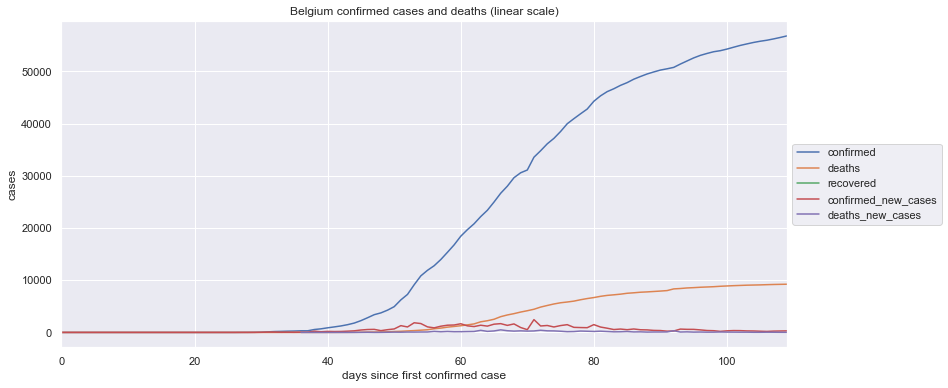

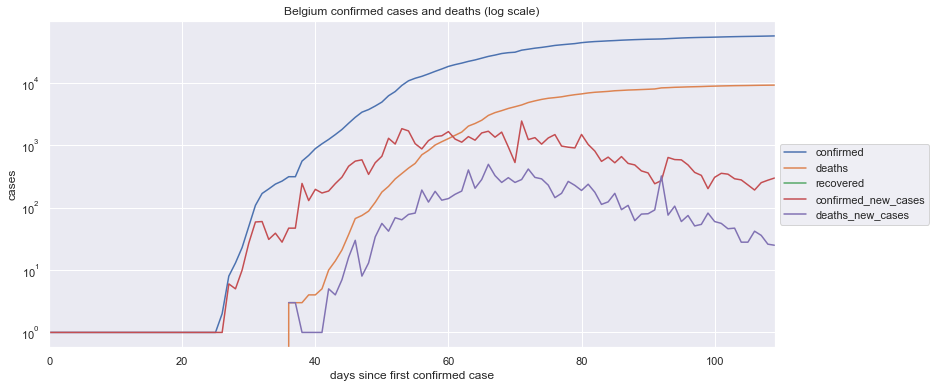

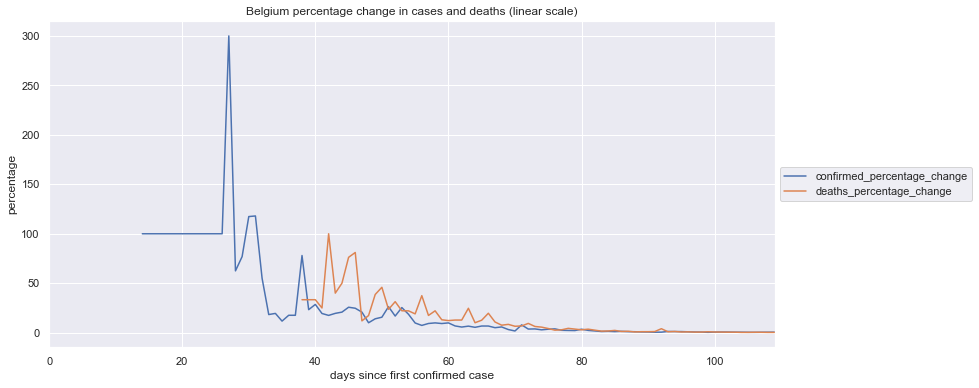

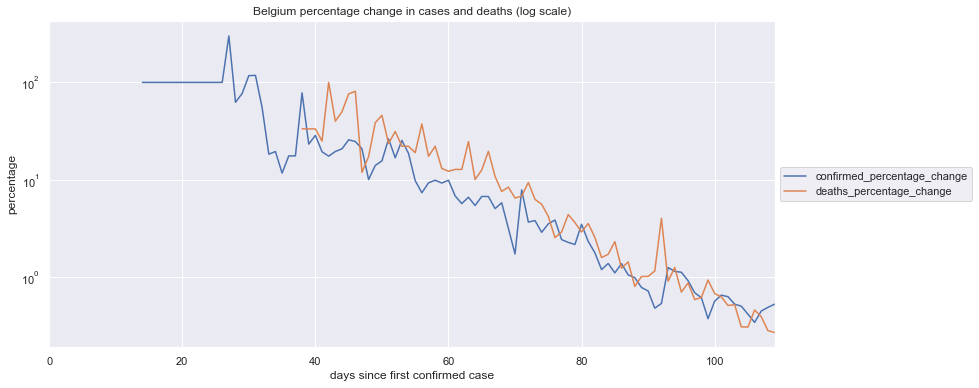

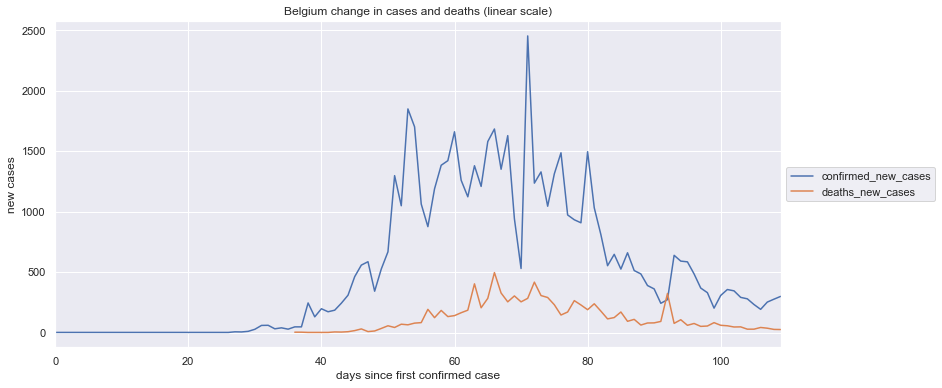

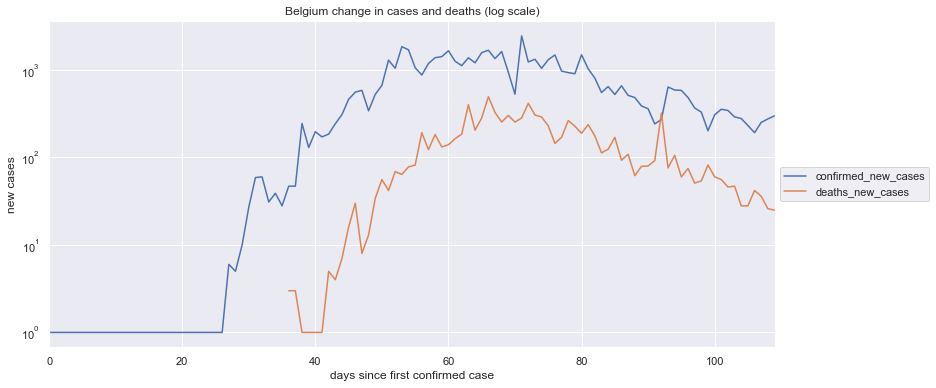

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
84      30618    1891       NaN                     0.068634   
85      30658    1892       NaN                     0.130642   
86      30694    1898       NaN                     0.117424   
87      30707    1903       NaN                     0.042354   
88      30725    1905       NaN                     0.058619   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
84                                         452.157792                 
85                                         860.662228                 
86                                         773.585377                 
87                                         279.022634                 
88                                         386.175473                 

    deaths_percentage_change  \
84                  0.265111   
85                  0.052882   
86                  0.317125   
87                  0.263435   
88                  0.105097   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
84                                        1746.537387           
85                                         348.383872           
86                                        2089.198422           
87                                        1735.495001           
88                                         692.374044           

    confirmed_new_cases  deaths_new_cases  
84                 21.0               5.0  
85                 40.0               1.0  
86                 36.0               6.0  
87                 13.0               5.0  
88                 18.0               2.0

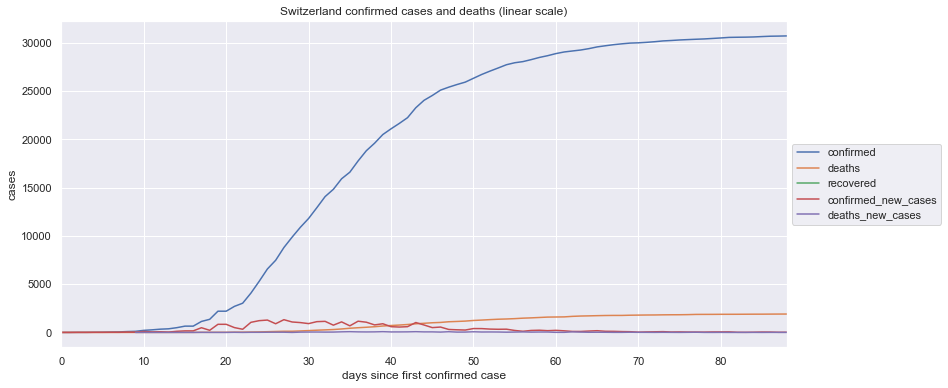

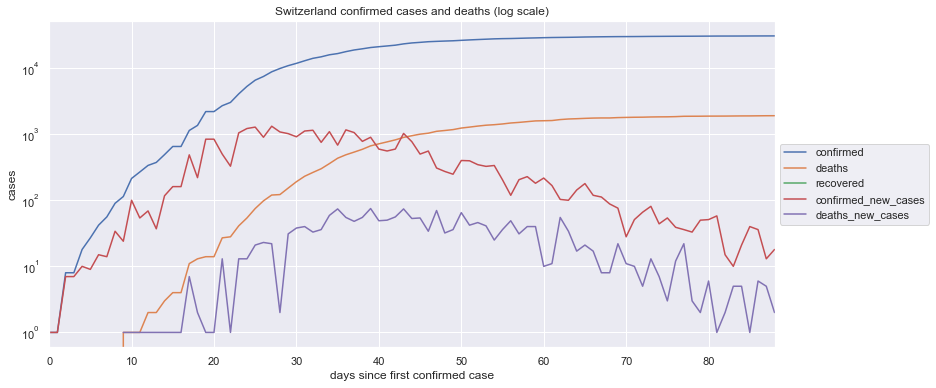

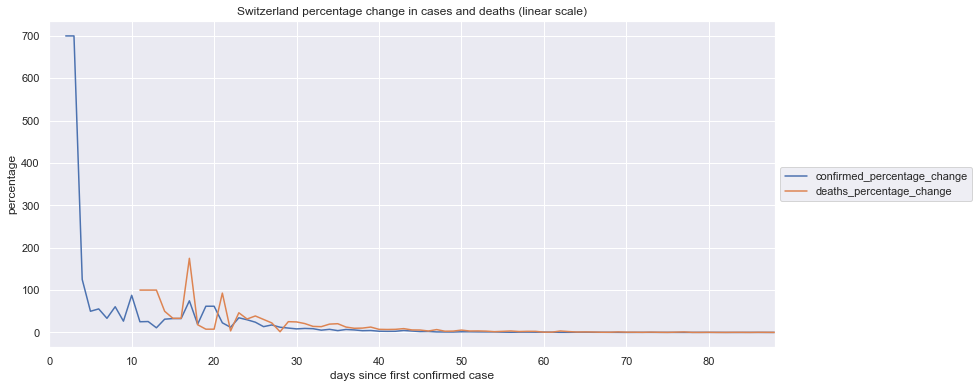

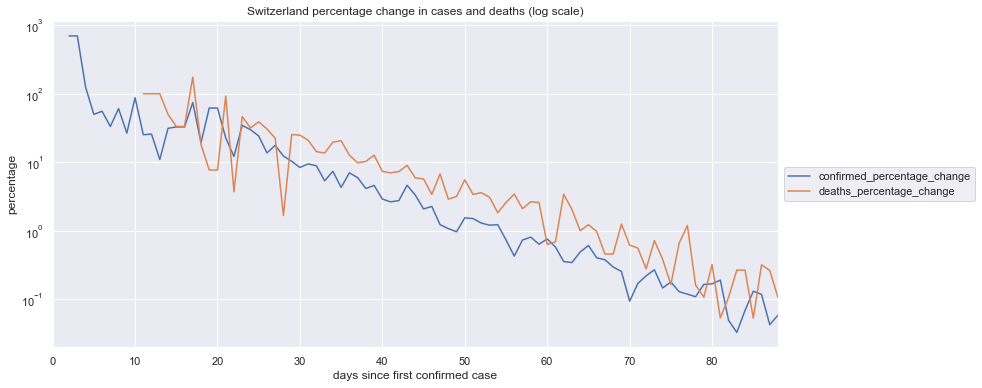

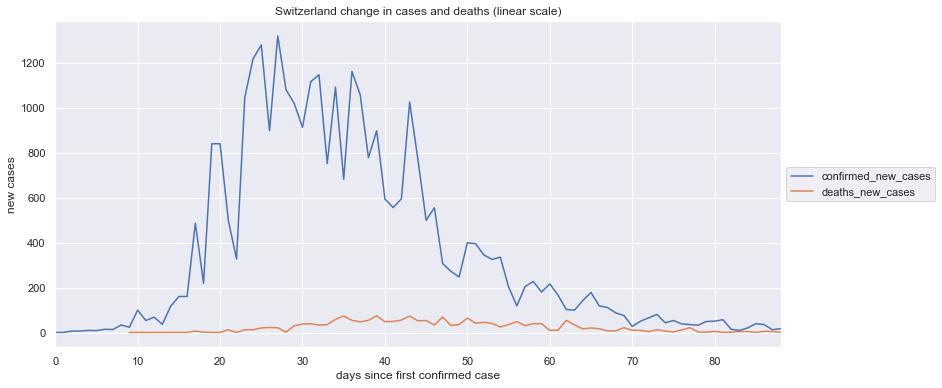

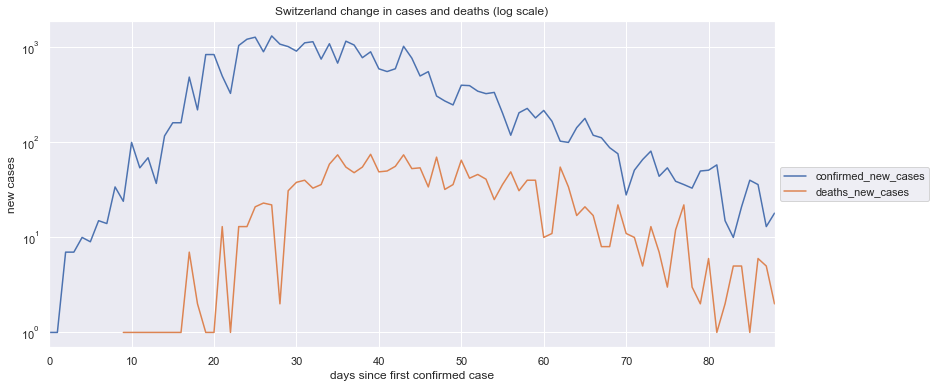

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
83       2840     165       NaN                     0.141044   
84       2850     166       NaN                     0.352113   
85       2853     168       NaN                     0.105263   
86       2874     169       NaN                     0.736067   
87       2876     171       NaN                     0.069589   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
83                                          80.789386                 
84                                         201.688996                 
85                                          60.294395                 
86                                         421.616954                 
87                                          39.860595                 

    deaths_percentage_change  \
83                  1.226994   
84                  0.606061   
85                  1.204819   
86                  0.595238   
87                  1.183432   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
83                                         702.818096           
84                                         347.149544           
85                                         690.116564           
86                                         340.950445           
87                                         677.865974           

    confirmed_new_cases  deaths_new_cases  
83                  4.0               2.0  
84                 10.0               1.0  
85                  3.0               2.0  
86                 21.0               1.0  
87                  2.0               2.0

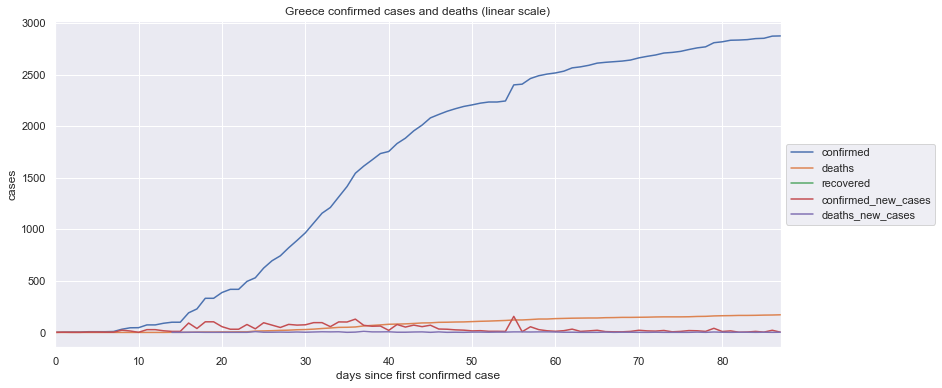

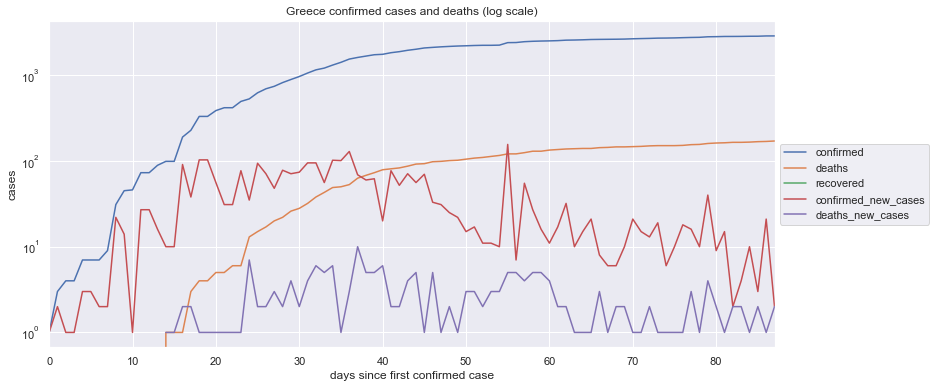

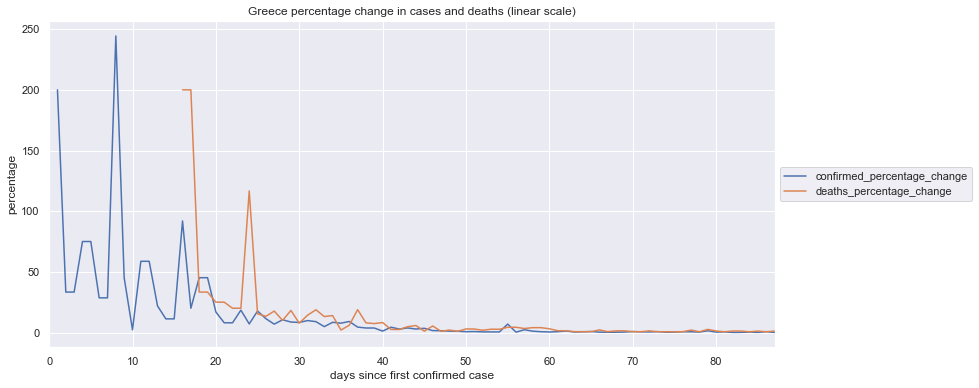

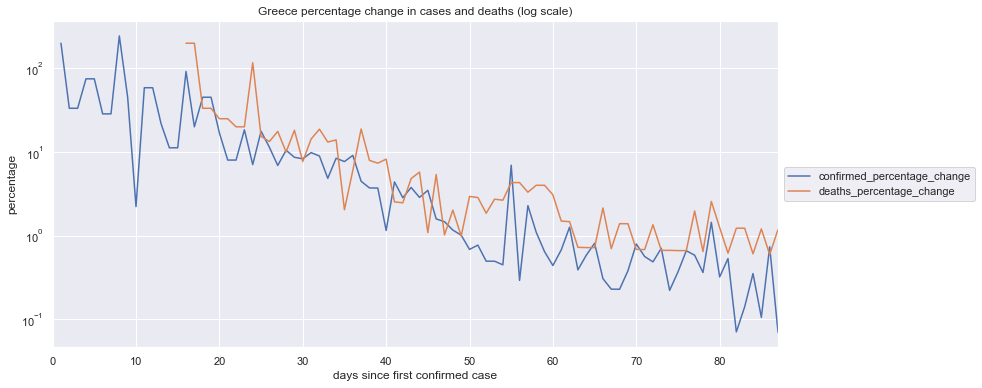

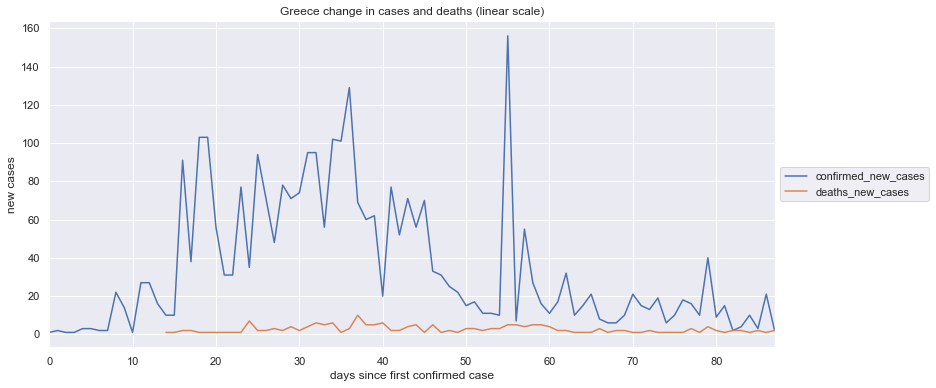

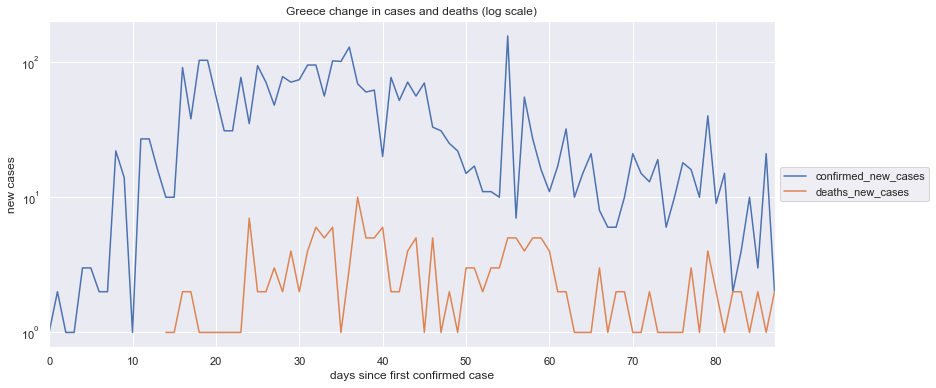

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
83       8267     233       NaN                     0.121109   
84       8281     234       NaN                     0.169348   
85       8309     235       NaN                     0.338123   
86       8332     235       NaN                     0.276808   
87       8346     235       NaN                     0.168027   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
83                                         215.898607                 
84                                         301.892430                 
85                                         602.764090                 
86                                         493.459145                 
87                                         299.537292                 

    deaths_percentage_change  \
83                  0.431034   
84                  0.429185   
85                  0.427350   
86                       NaN   
87                       NaN   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
83                                         768.394309           
84                                         765.096479           
85                                         761.826836           
86                                                NaN           
87                                                NaN           

    confirmed_new_cases  deaths_new_cases  
83                 10.0               1.0  
84                 14.0               1.0  
85                 28.0               1.0  
86                 23.0               NaN  
87                 14.0               NaN

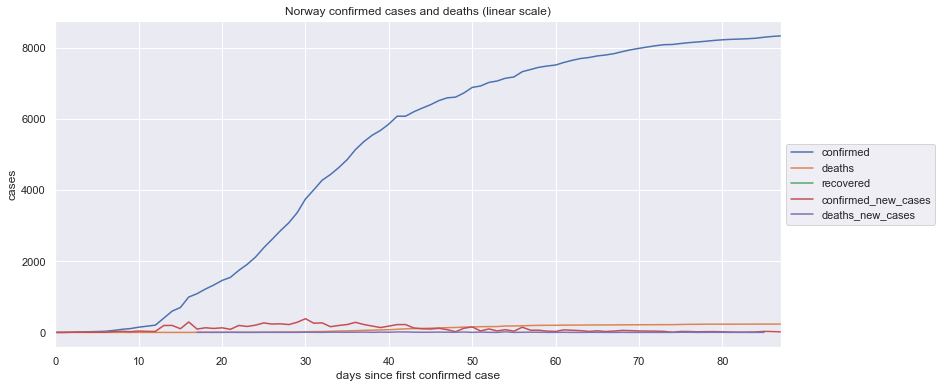

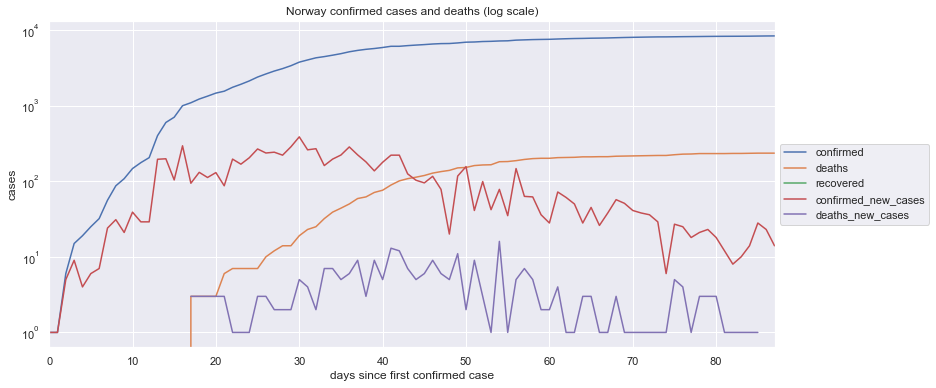

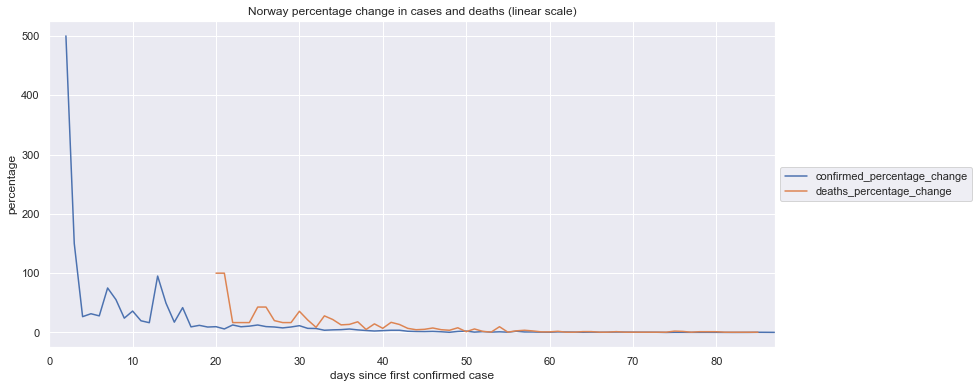

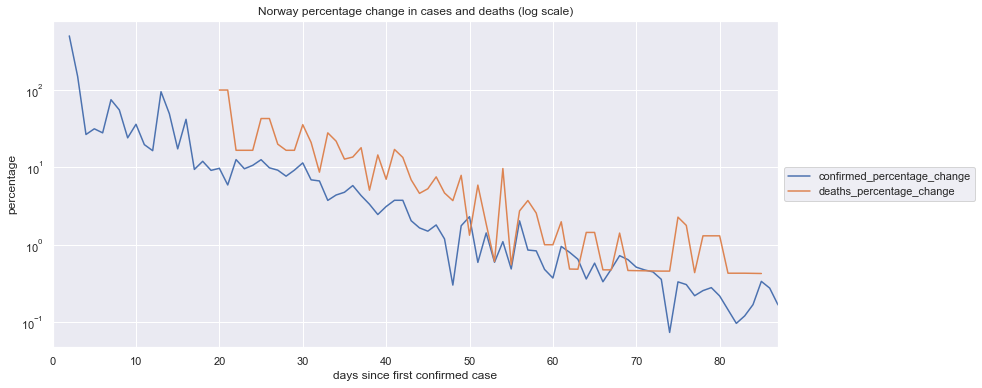

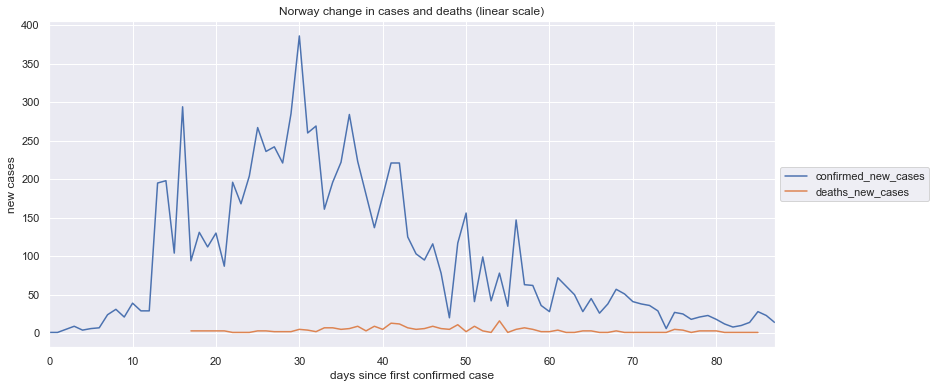

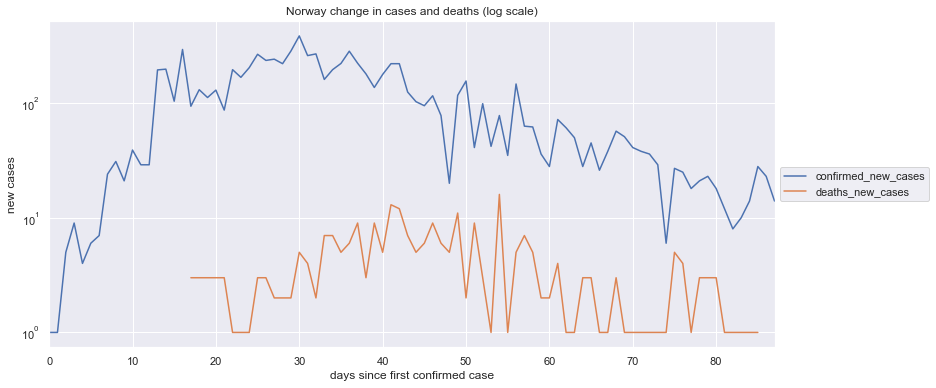

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
84      16321     632       NaN                     0.319626   
85      16353     633       NaN                     0.196066   
86      16404     633       NaN                     0.311869   
87      16436     635       NaN                     0.195074   
88      16486     639       NaN                     0.304210   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
84                                        1129.934780                 
85                                         693.129058                 
86                                        1102.512778                 
87                                         689.622004                 
88                                        1075.436480                 

    deaths_percentage_change  \
84                  0.476948   
85                  0.158228   
86                  0.158228   
87                  0.315956   
88                  0.629921   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
84                                        1686.092908           
85                                         559.363101           
86                                         559.363101           
87                                        1116.958862           
88                                        2226.881762           

    confirmed_new_cases  deaths_new_cases  
84                 52.0               3.0  
85                 32.0               1.0  
86                 51.0               1.0  
87                 32.0               2.0  
88                 50.0               4.0

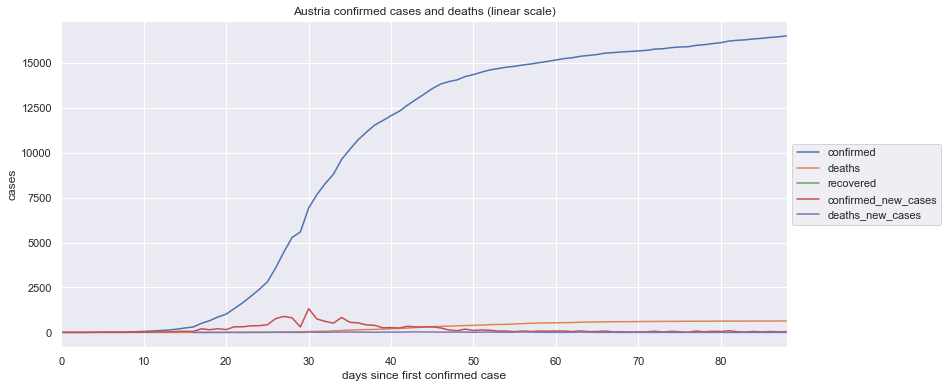

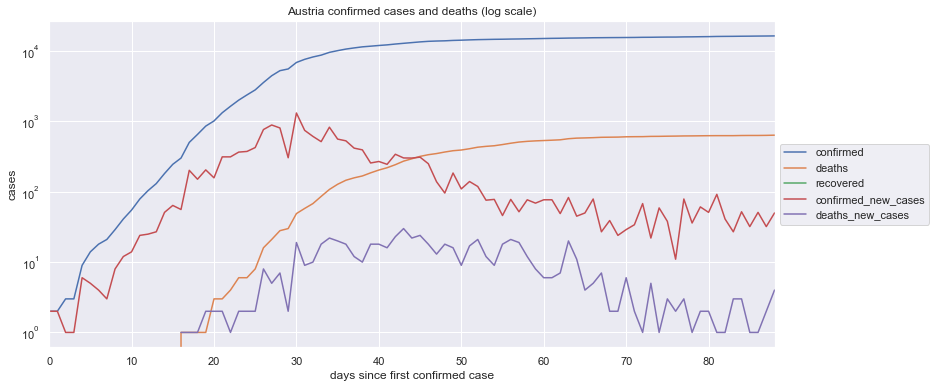

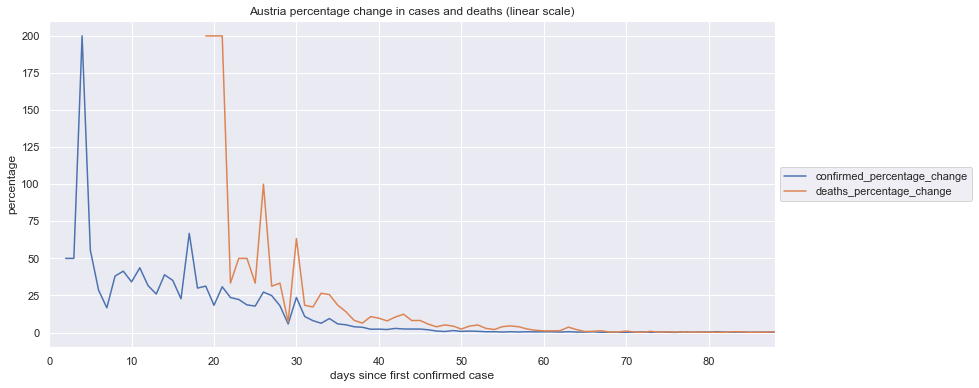

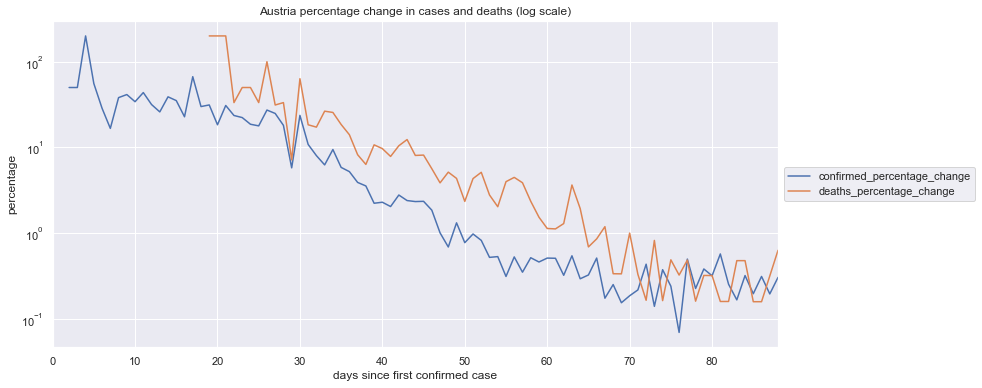

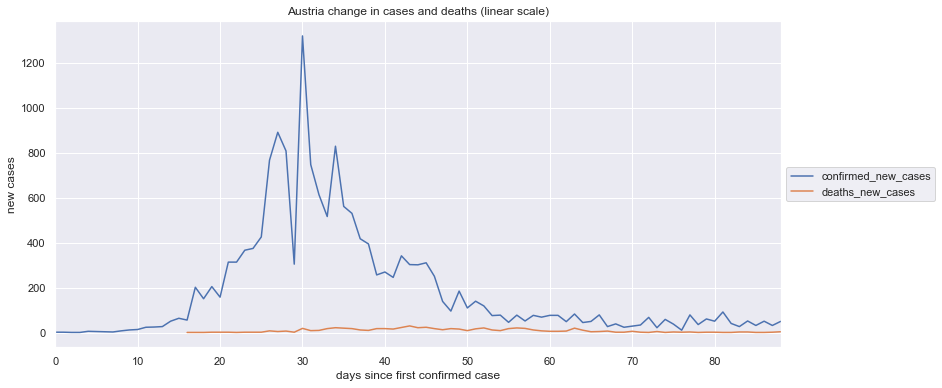

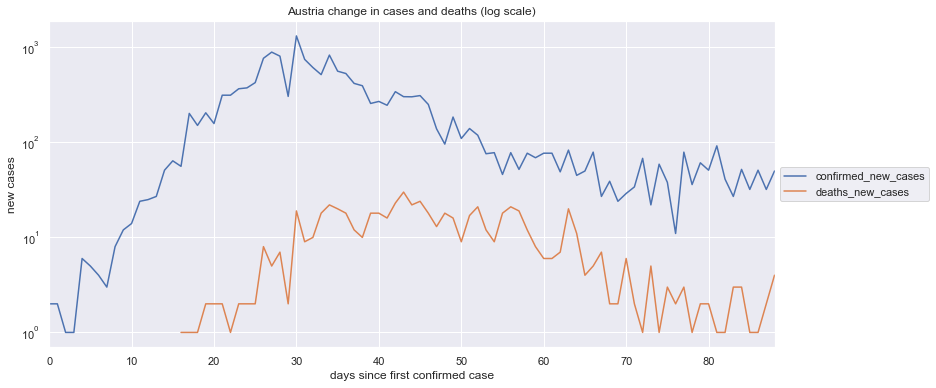

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
109      30799    3743       NaN                     1.389209   
110      31523    3831       NaN                     2.350726   
111      32172    3871       NaN                     2.058814   
112      32809    3925       NaN                     1.979983   
113      33188    3992       NaN                     1.155171   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
109                                        5931.340517                 
110                                       10036.614376                 
111                                        8790.274607                 
112                                        8453.696657                 
113                                        4932.095806                 

     deaths_percentage_change  \
109                  1.216874   
110                  2.351055   
111                  1.044114   
112                  1.394988   
113                  1.707006   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
109                                        5195.542416           
110                                       10038.021760           
111                                        4457.928792           
112                                        5956.016281           
113                                        7288.202475           

     confirmed_new_cases  deaths_new_cases  
109                422.0              45.0  
110                724.0              88.0  
111                649.0              40.0  
112                637.0              54.0  
113                379.0              67.0

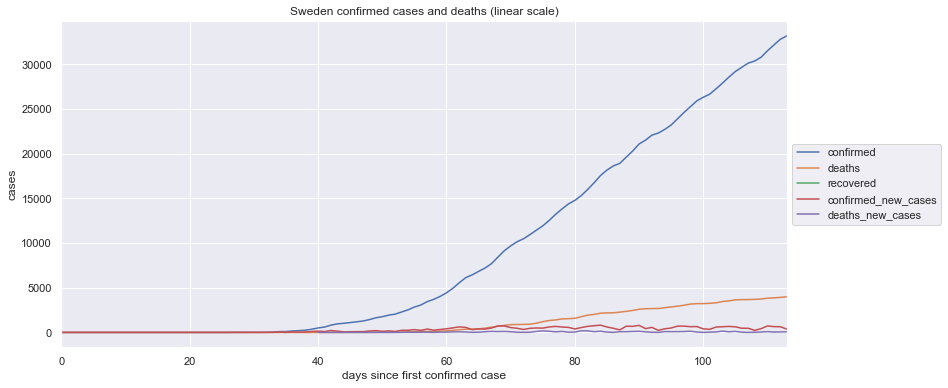

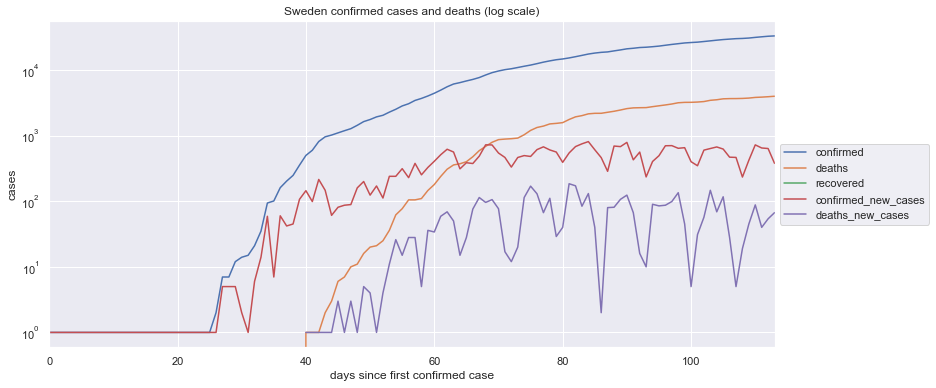

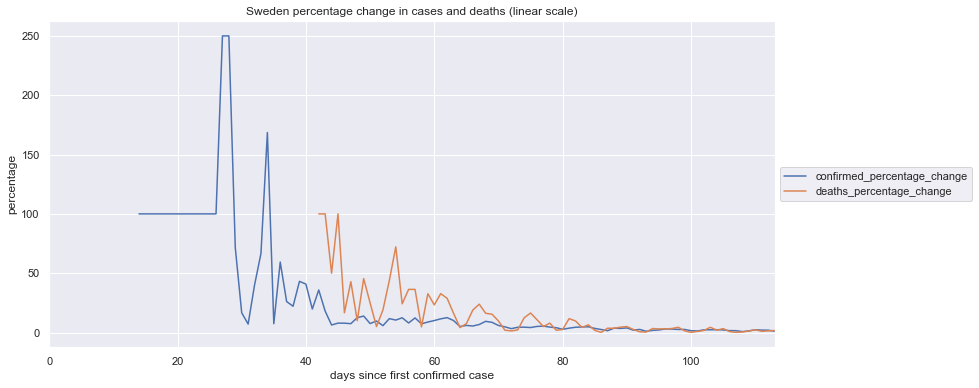

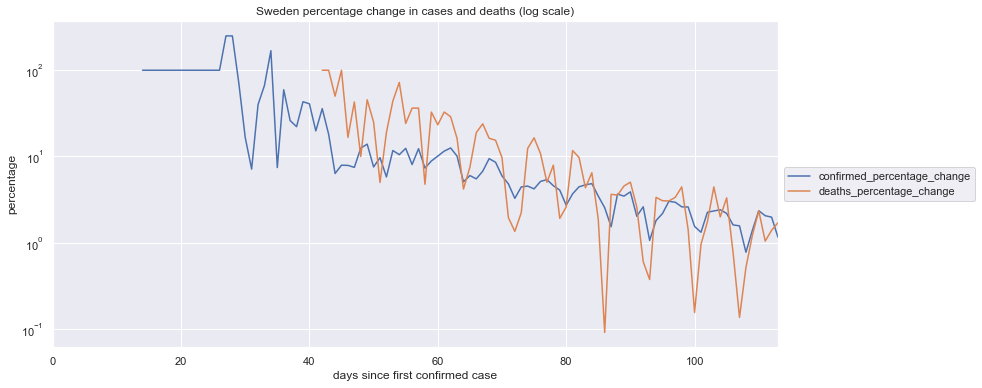

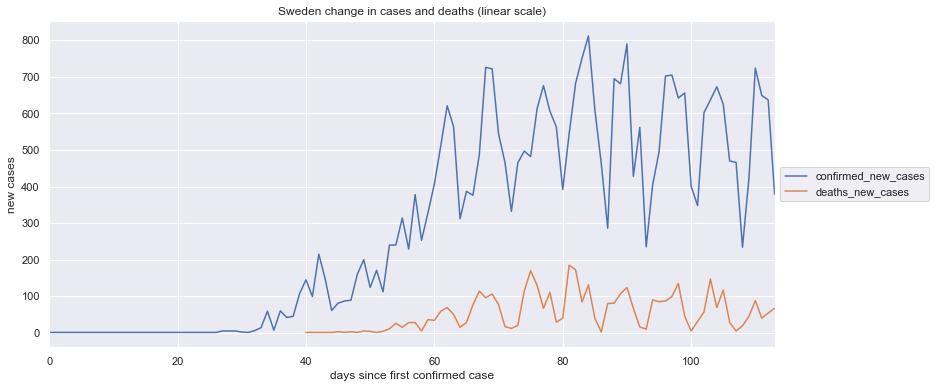

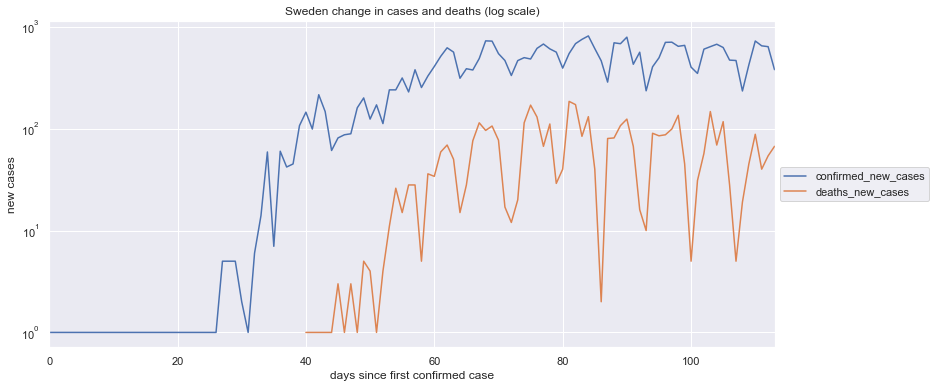

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
80      24251    1561       NaN                     0.210744   
81      24315    1571       NaN                     0.263907   
82      24391    1583       NaN                     0.312564   
83      24506    1592       NaN                     0.471485   
84      24582    1604       NaN                     0.310128   

    confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
80                                         789.291222                 
81                                         988.400110                 
82                                        1170.635745                 
83                                        1765.837342                 
84                                        1161.511798                 

    deaths_percentage_change  \
80                  0.904977   
81                  0.640615   
82                  0.763845   
83                  0.568541   
84                  0.753769   

    deaths_percentage_change_by_half_mean_deaths_cases_factor  \
80                                        3389.379392           
81                                        2399.272407           
82                                        2860.800174           
83                                        2129.335316           
84                                        2823.063488           

    confirmed_new_cases  deaths_new_cases  
80                 51.0              14.0  
81                 64.0              10.0  
82                 76.0              12.0  
83                115.0               9.0  
84                 76.0              12.0

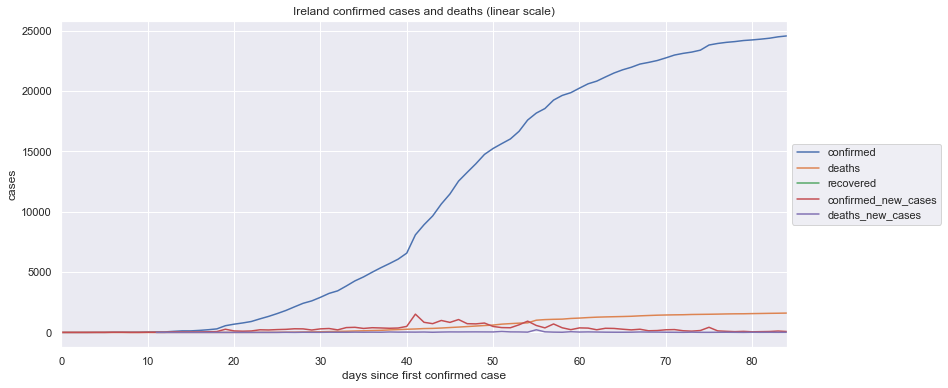

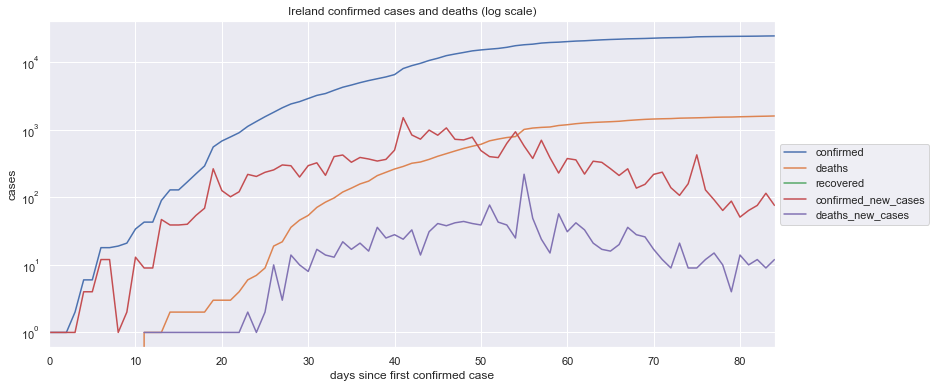

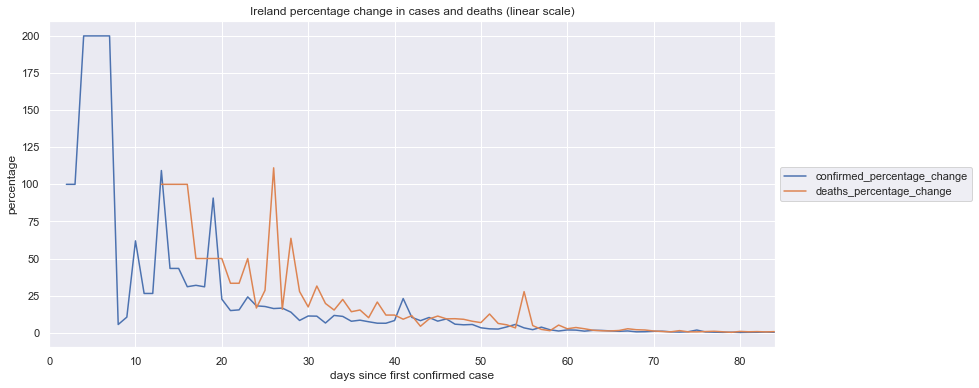

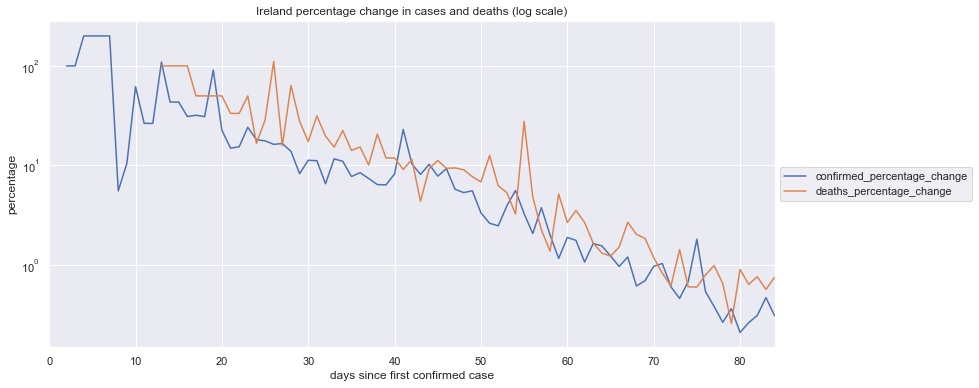

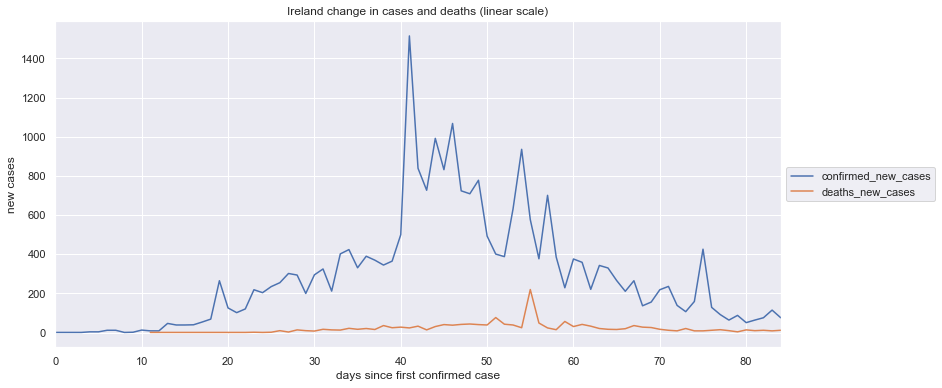

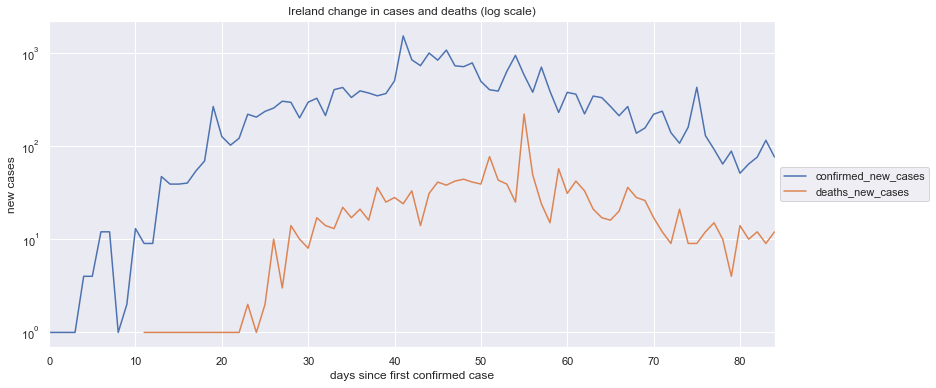

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
109     248818   35341       NaN                     0.978872   
110     248293   35704       NaN                    -0.210998   
111     250908   36042       NaN                     1.053191   
112     254195   36393       NaN                     1.310042   
113     257154   36675       NaN                     1.164067   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
109                                       33029.346807                 
110                                       -7119.532369                 
111                                       35537.033990                 
112                                       44203.754248                 
113                                       39278.231164                 

     deaths_percentage_change  \
109                  1.566272   
110                  1.027136   
111                  0.946673   
112                  0.973864   
113                  0.774874   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
109                                       52849.531345           
110                                       34657.860662           
111                                       31942.859173           
112                                       32860.350729           
113                                       26145.997254           

     confirmed_new_cases  deaths_new_cases  
109               2412.0             545.0  
110               -525.0             363.0  
111               2615.0             338.0  
112               3287.0             351.0  
113               2959.0             282.0

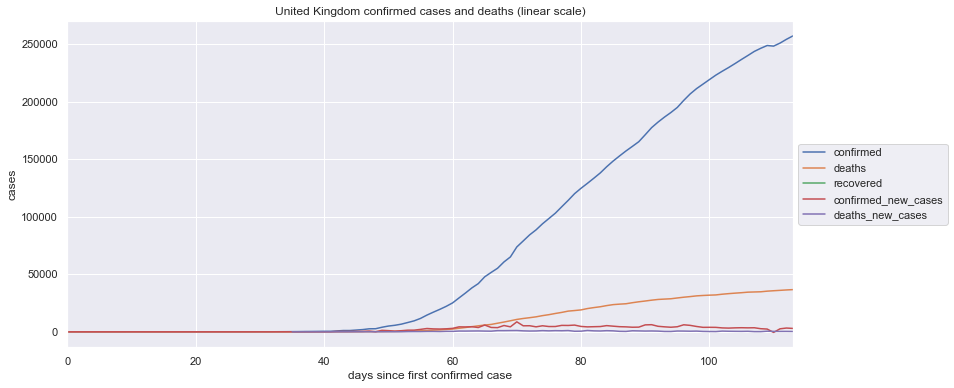

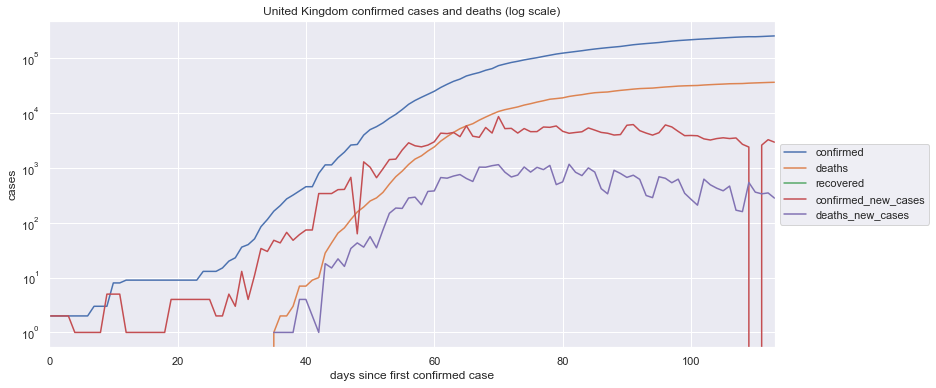

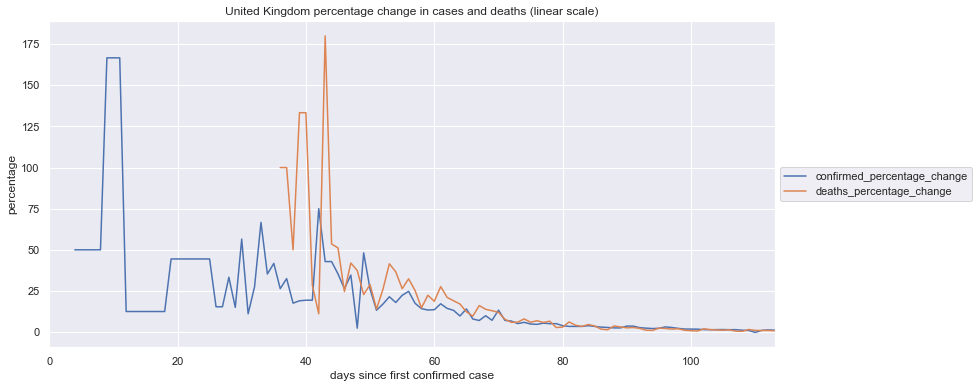

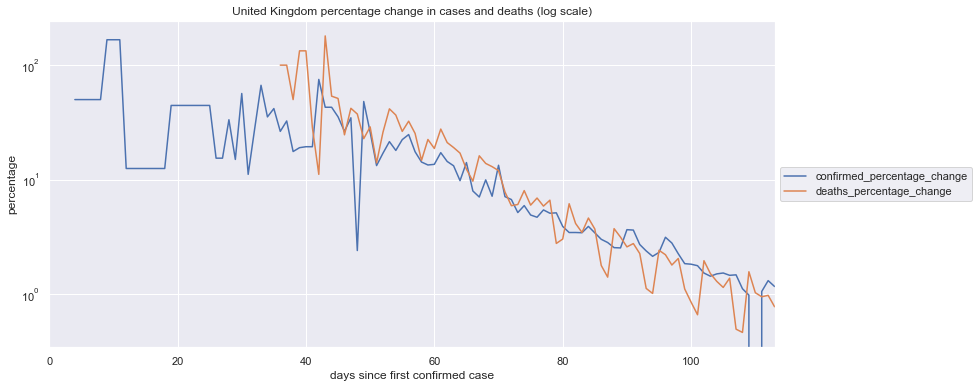

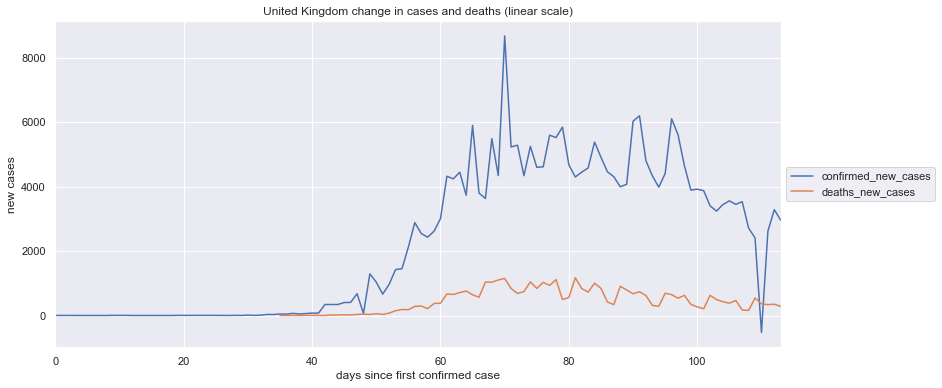

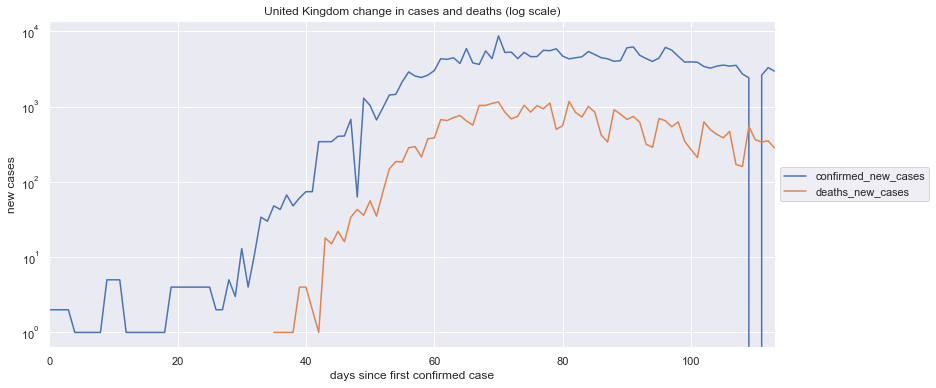

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
113     177778    8081       NaN                     0.694983   
114     178473    8144       NaN                     0.390937   
115     179021    8203       NaN                     0.307049   
116     179710    8228       NaN                     0.384871   
117     179986    8261       NaN                     0.153581   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
113                                       24025.316260                 
114                                       13514.547867                 
115                                       10614.578835                 
116                                       13304.849781                 
117                                        5309.230373                 

     deaths_percentage_change  \
113                  0.974635   
114                  0.779606   
115                  0.724460   
116                  0.304767   
117                  0.401070   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
113                                       33692.754546           
114                                       26950.707773           
115                                       25044.304700           
116                                       10535.666854           
117                                       13864.824899           

     confirmed_new_cases  deaths_new_cases  
113               1227.0              78.0  
114                695.0              63.0  
115                548.0              59.0  
116                689.0              25.0  
117                276.0              33.0

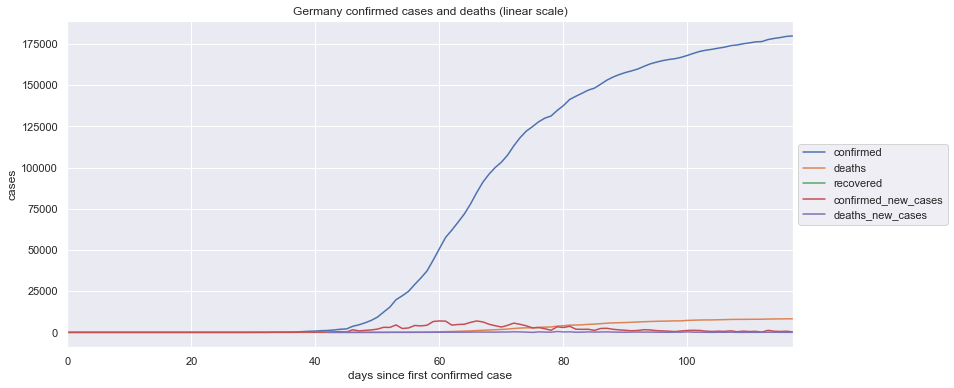

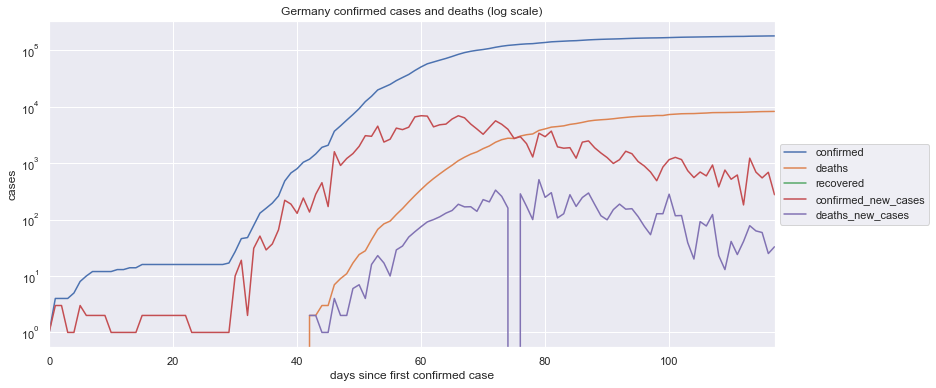

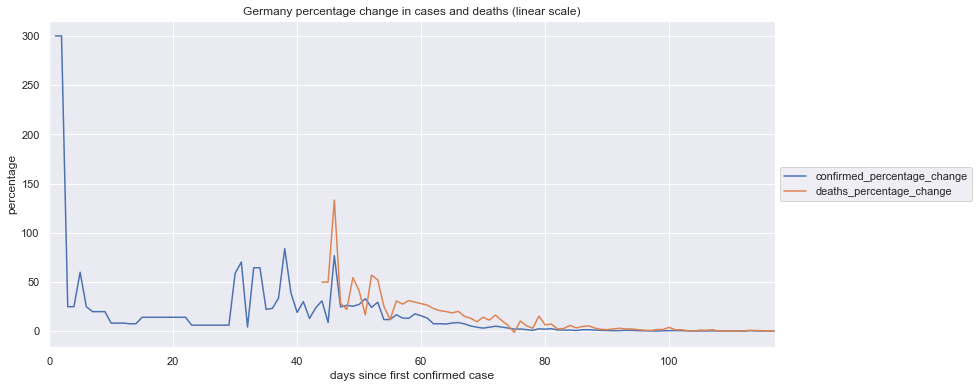

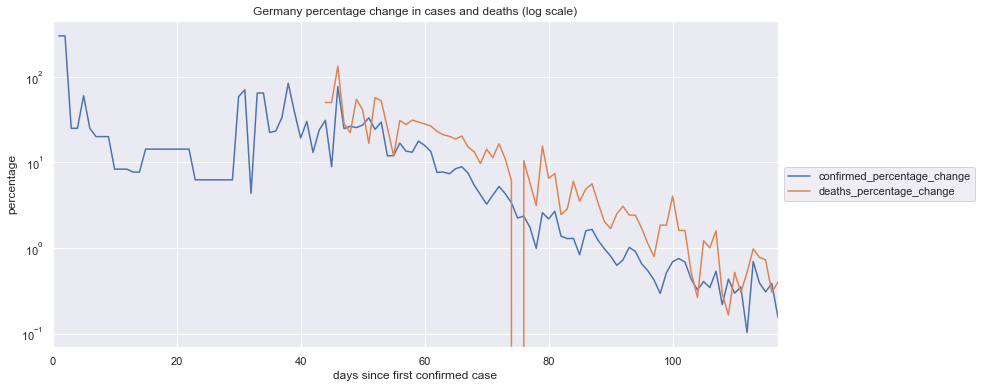

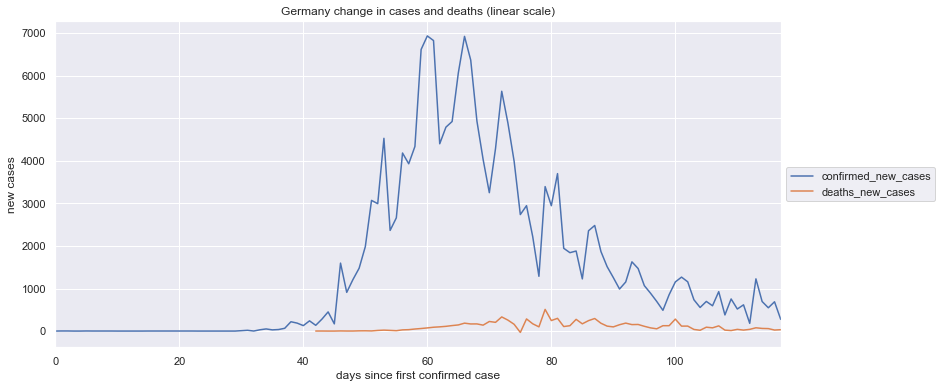

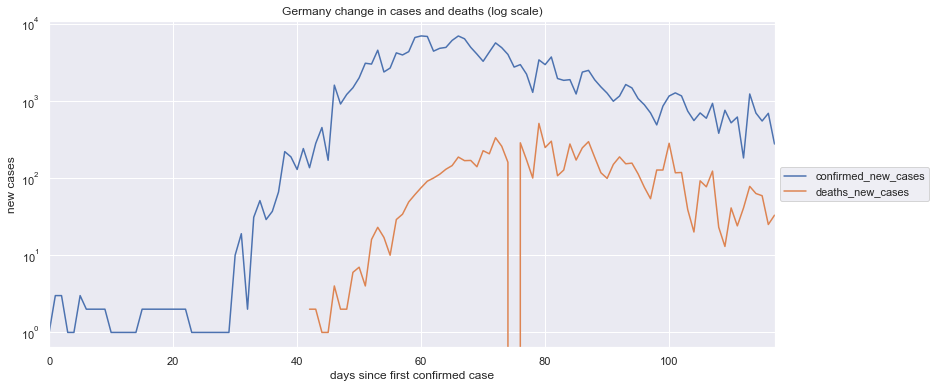

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
109     226699   32169       NaN                     0.359916   
110     227364   32330       NaN                     0.293341   
111     228006   32486       NaN                     0.282367   
112     228658   32616       NaN                     0.285957   
113     229327   32735       NaN                     0.292577   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
109                                       16394.873132                 
110                                       13362.227777                 
111                                       12862.345070                 
112                                       13025.912298                 
113                                       13327.434198                 

     deaths_percentage_change  \
109                  0.506139   
110                  0.500482   
111                  0.482524   
112                  0.400172   
113                  0.364852   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
109                                       23055.623655           
110                                       22797.915784           
111                                       21979.900568           
112                                       18228.626315           
113                                       16619.696652           

     confirmed_new_cases  deaths_new_cases  
109                813.0             162.0  
110                665.0             161.0  
111                642.0             156.0  
112                652.0             130.0  
113                669.0             119.0

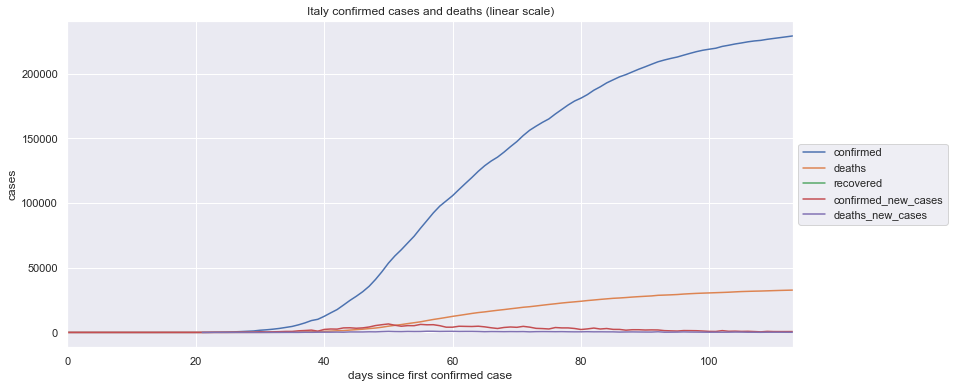

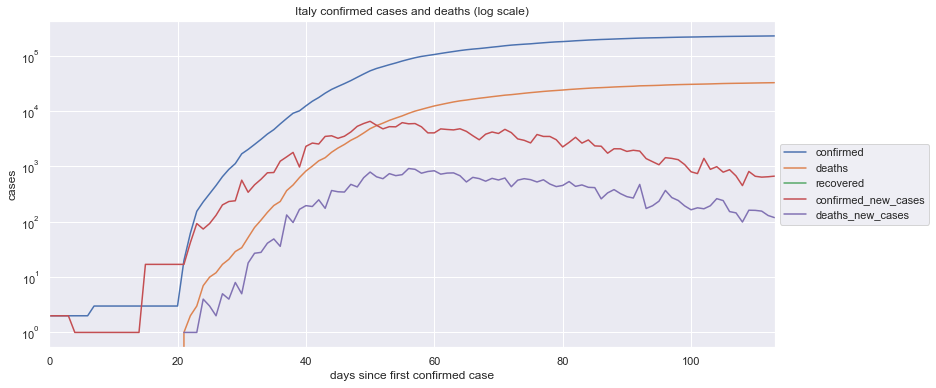

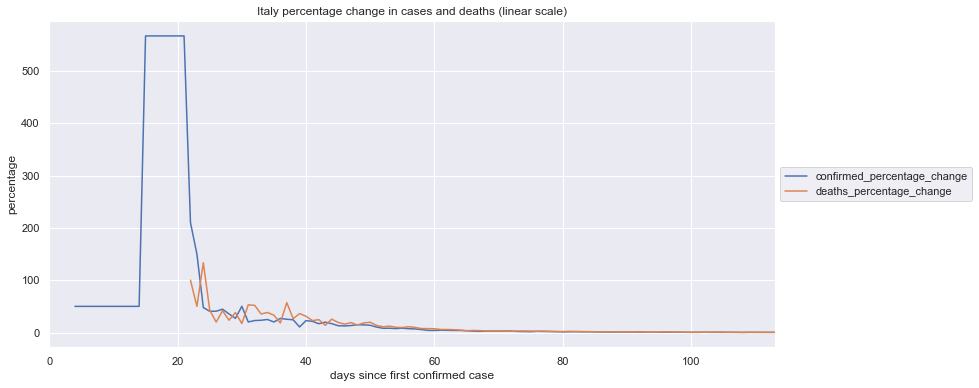

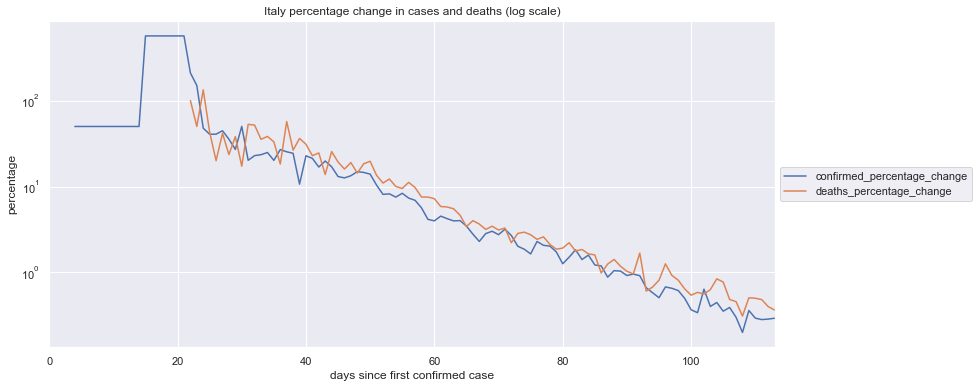

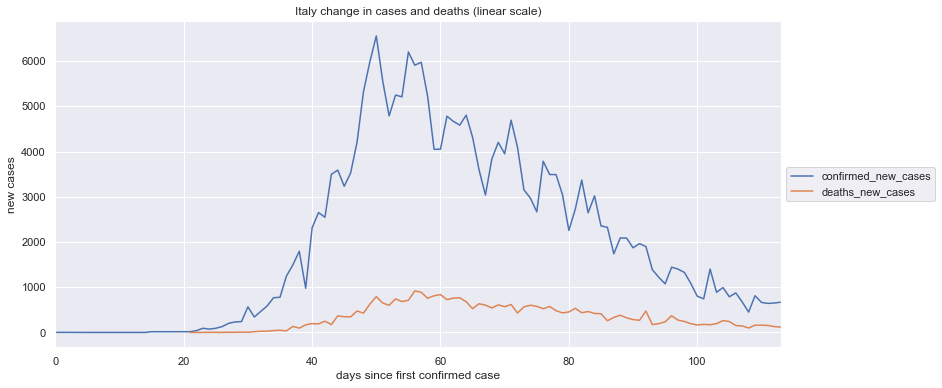

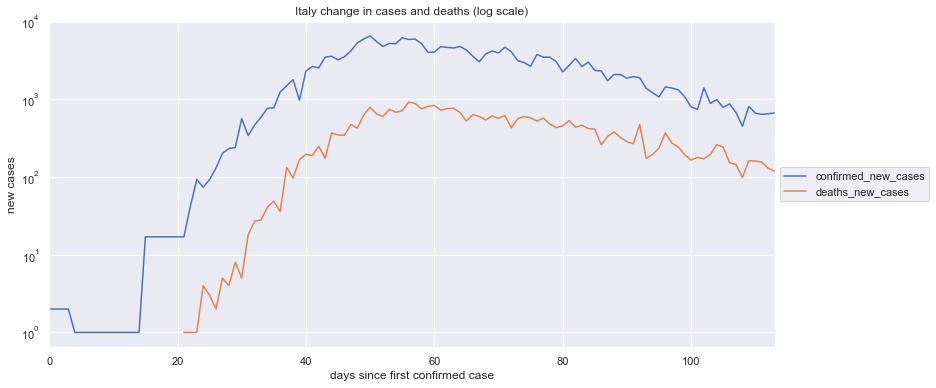

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
118    1528568   91921       NaN                     1.343227   
119    1551853   93439       NaN                     1.523321   
120    1577147   94702       NaN                     1.629922   
121    1600937   95979       NaN                     1.508420   
122    1622612   97087       NaN                     1.353895   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
118                                      284547.379747                 
119                                      322698.289210                 
120                                      345280.552845                 
121                                      319541.634341                 
122                                      286807.199243                 

     deaths_percentage_change  \
118                  1.742172   
119                  1.651418   
120                  1.351684   
121                  1.348440   
122                  1.154419   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
118                                      369059.319007           
119                                      349834.160829           
120                                      286338.900454           
121                                      285651.777351           
122                                      244550.595070           

     confirmed_new_cases  deaths_new_cases  
118              20260.0            1574.0  
119              23285.0            1518.0  
120              25294.0            1263.0  
121              23790.0            1277.0  
122              21675.0            1108.0

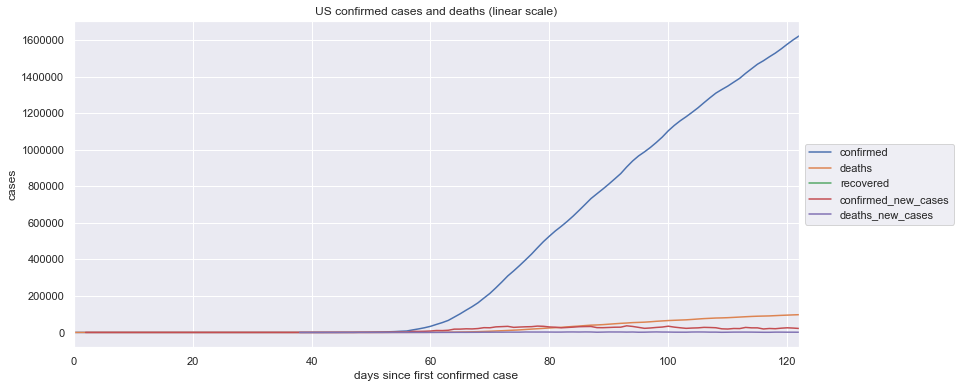

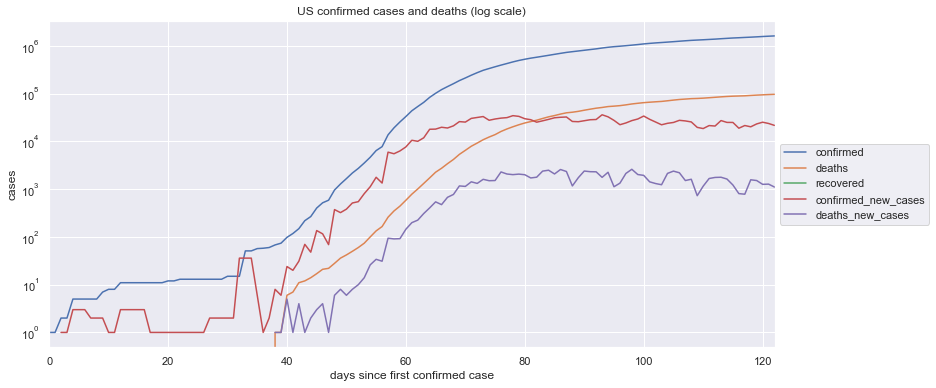

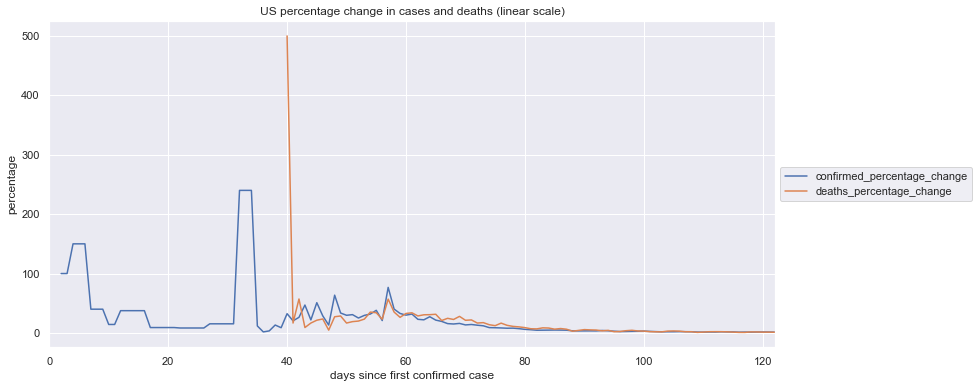

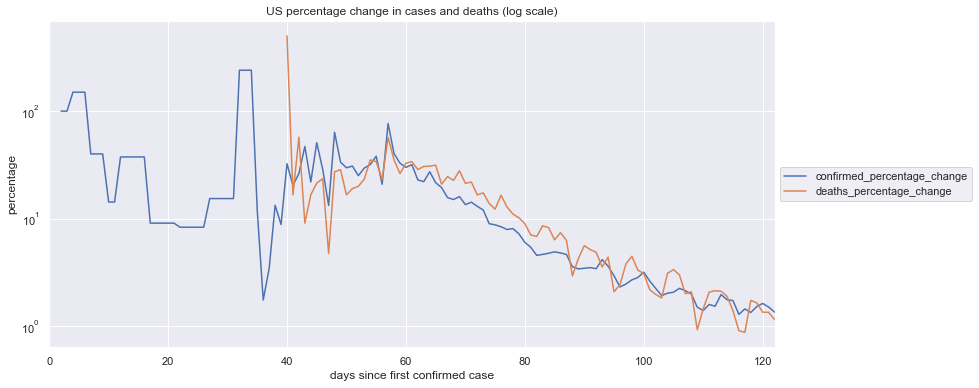

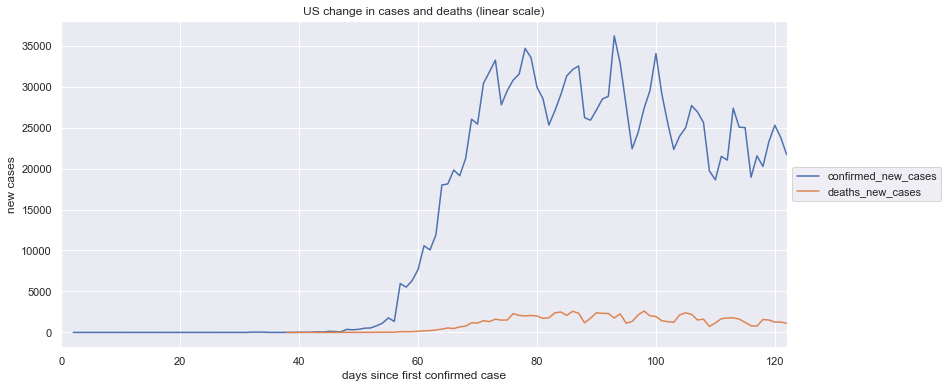

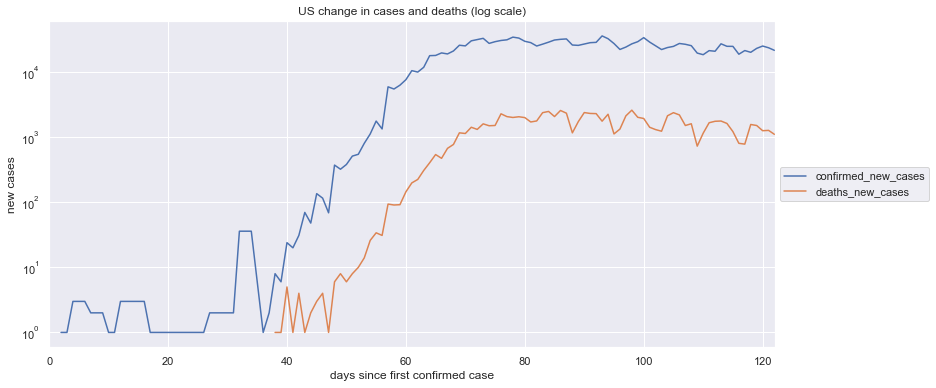

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [20]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland]

In [21]:
#South_Korea

In [22]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
118                  11110                 263                   NaN   
119                  11122                 264                   NaN   
120                  11142                 264                   NaN   
121                  11165                 266                   NaN   
122                  11190                 266                   NaN   

     confirmed_percentage_change_South_Korea  \
118                                 0.288861   
119                                 0.108011   
120                                 0.179824   
121                                 0.206426   
122                                 0.223914   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
118                                         968.291949                             
119                                         362.063621                             
120                                         602.788292                             
121                                         691.962223                             
122                                         750.583451                             

     deaths_percentage_change_South_Korea  \
118                              0.380228   
119                              0.380228   
120                              0.380228   
121                              0.757576   
122                                   NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
118                                        1274.564902                       
119                                        1274.564902                       
120                                        1274.564902                       
121                                        2539.474008                       
122                                                NaN                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
118                             32.0                           1.0   
119                             12.0                           1.0   
120                             20.0                           1.0   
121                             23.0                           2.0   
122                             25.0                           NaN   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
118               NaN            NaN              NaN   
119               NaN            NaN              NaN   
120               NaN            NaN              NaN   
121               NaN            NaN              NaN   
122               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
118                                 NaN   
119                                 NaN   
120                                 NaN   
121                                 NaN   
122                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
118                                                NaN                        
119                                                NaN                        
120                                                NaN                        
121                                                NaN                        
122                                                NaN                        

     deaths_percentage_change_Sweden  \
118                              NaN   
119                              NaN   
120                              NaN   
121                              NaN   
122                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
118                                                NaN                  
119                                                NaN                  
120                                                NaN                  
121    

# comparisons: confirmed cases

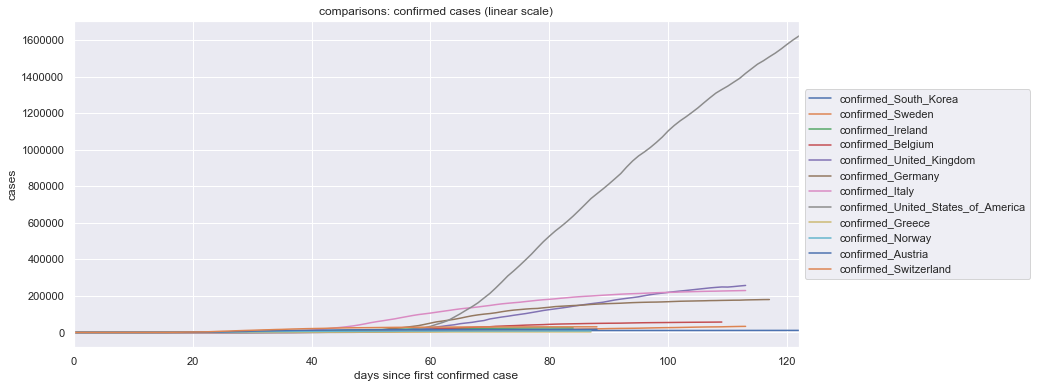

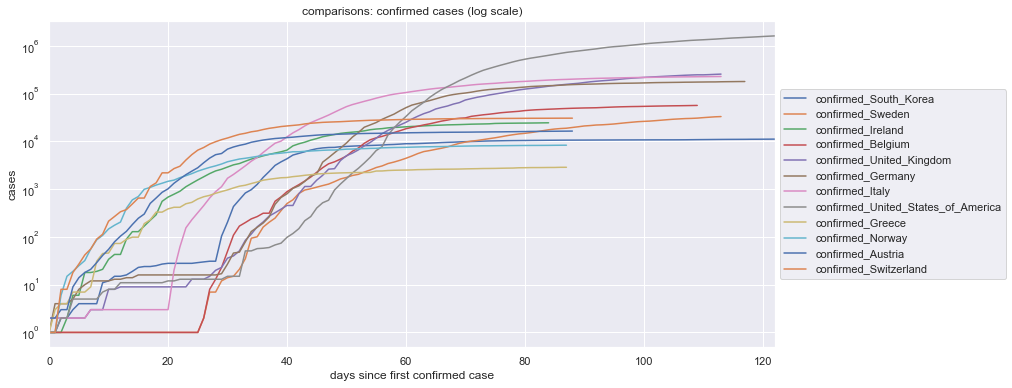

In [23]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

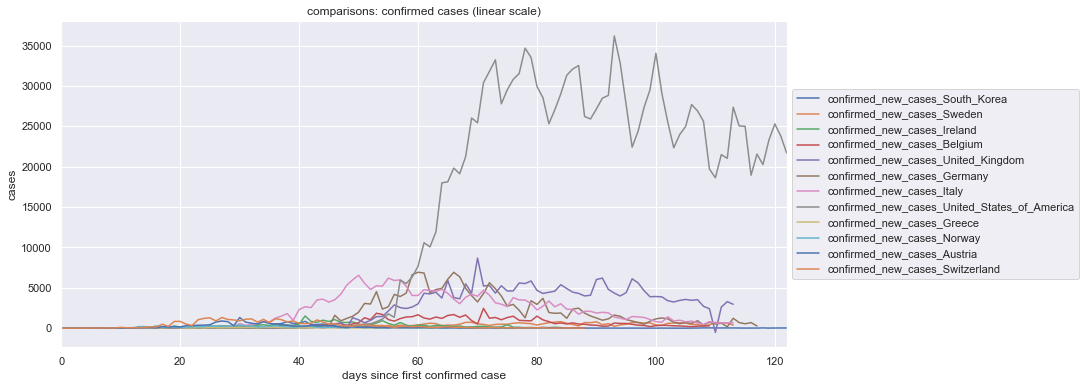

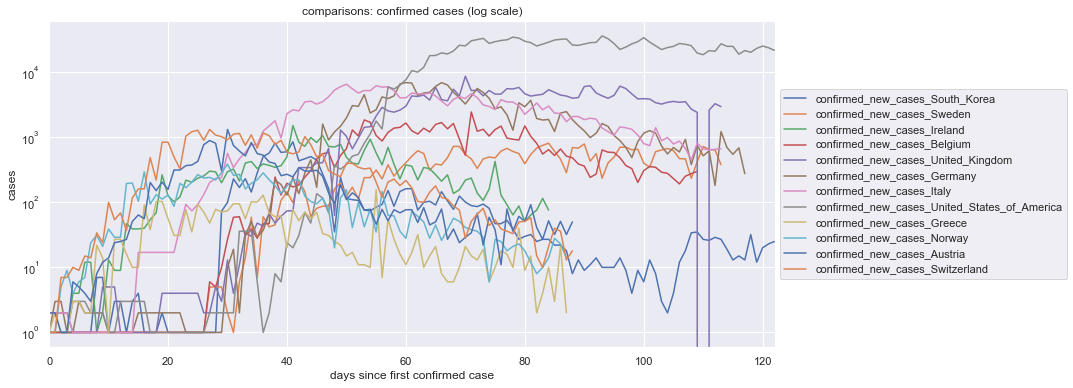

In [24]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

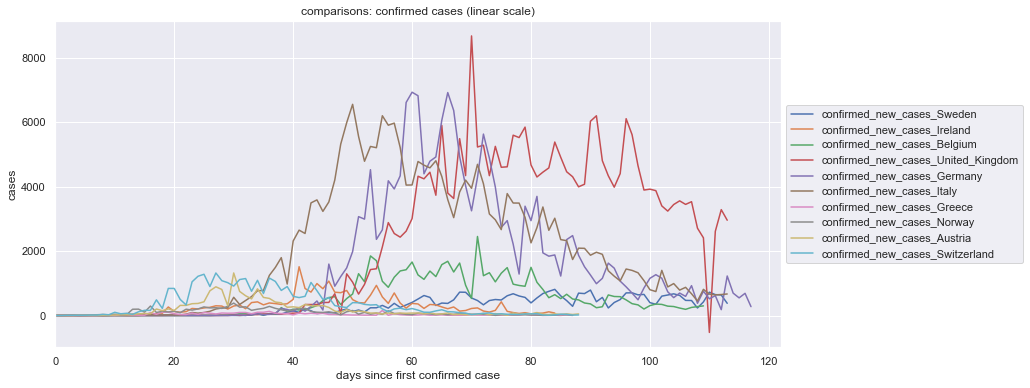

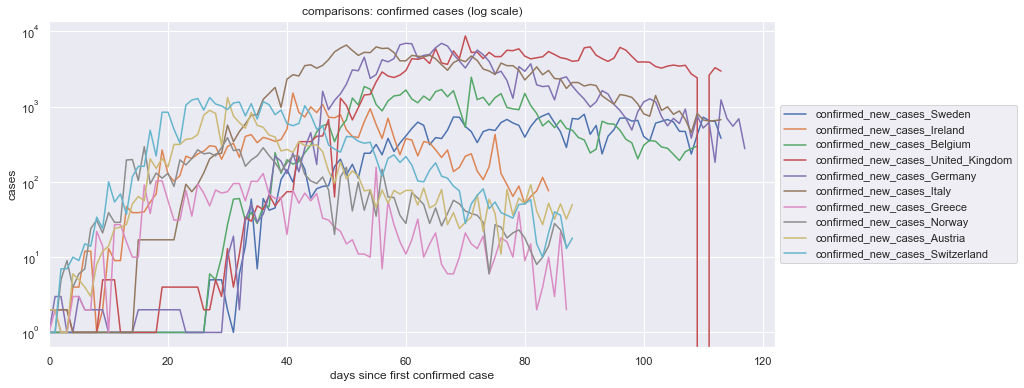

In [25]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
118                 263            NaN             NaN             NaN   
119                 264            NaN             NaN             NaN   
120                 264            NaN             NaN             NaN   
121                 266            NaN             NaN             NaN   
122                 266            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
118                    NaN             NaN           NaN   
119                    NaN             NaN           NaN   
120                    NaN             NaN           NaN   
121                    NaN             NaN           NaN   
122                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
118                            91921            NaN            NaN   
119                            93439            NaN            NaN   
120                            94702            NaN            NaN   
121                            95979            NaN            NaN   
122                            97087            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
118             NaN                 NaN  
119             NaN                 NaN  
120             NaN                 NaN  
121             NaN                 NaN  
122             NaN                 NaN

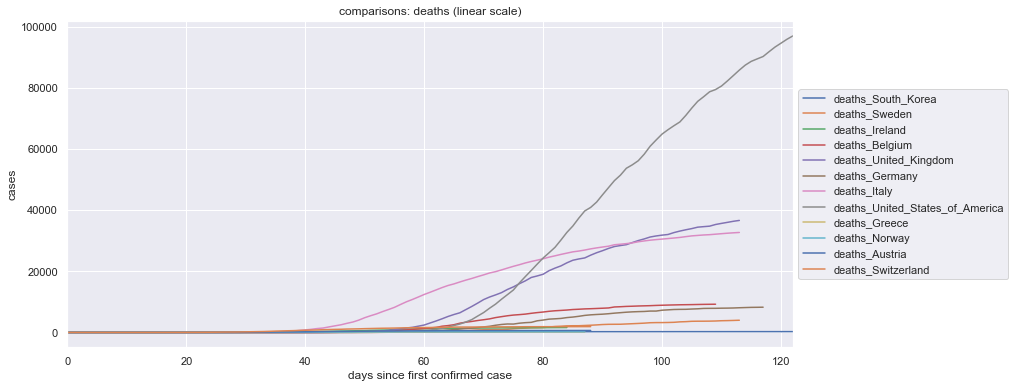

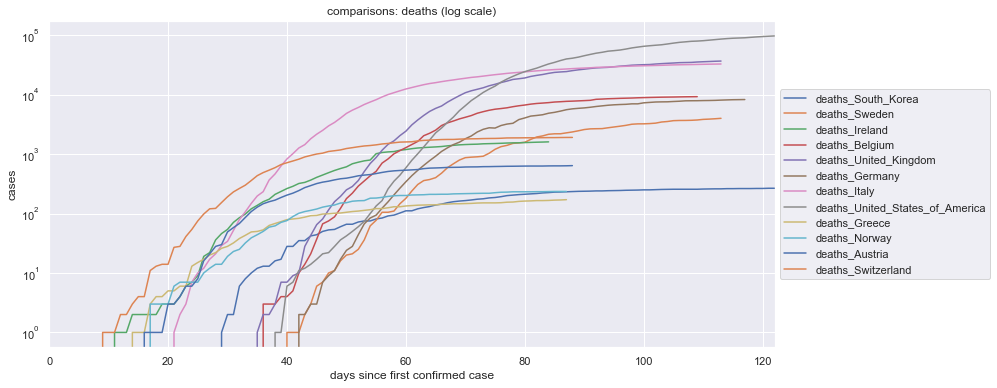

In [26]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
118            NaN             NaN             NaN                    NaN   
119            NaN             NaN             NaN                    NaN   
120            NaN             NaN             NaN                    NaN   
121            NaN             NaN             NaN                    NaN   
122            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
118             NaN           NaN            NaN            NaN   
119             NaN           NaN            NaN            NaN   
120             NaN           NaN            NaN            NaN   
121             NaN           NaN            NaN            NaN   
122             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
118             NaN                 NaN  
119             NaN                 NaN  
120             NaN                 NaN  
121             NaN                 NaN  
122             NaN                 NaN

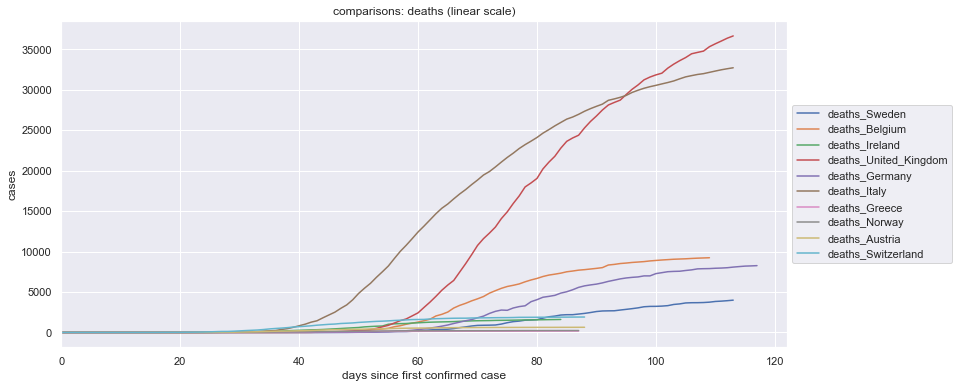

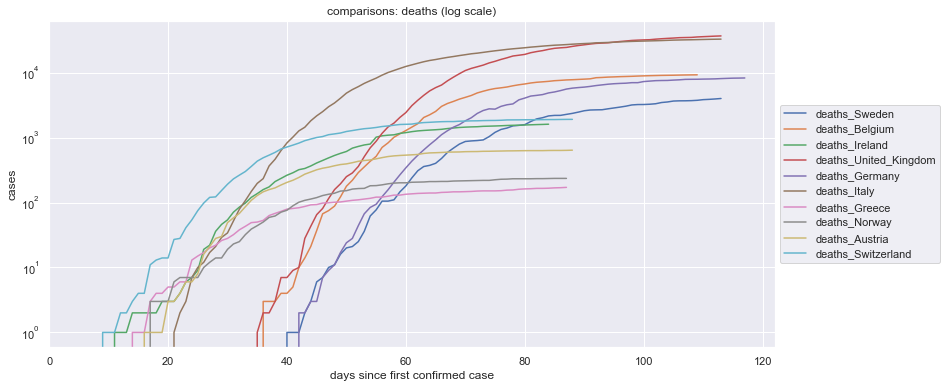

In [27]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
118                           1.0                      NaN   
119                           1.0                      NaN   
120                           1.0                      NaN   
121                           2.0                      NaN   
122                           NaN                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
118                       NaN                       NaN   
119                       NaN                       NaN   
120                       NaN                       NaN   
121                       NaN                       NaN   
122                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
118                              NaN                       NaN   
119                              NaN                       NaN   
120                              NaN                       NaN   
121                              NaN                       NaN   
122                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
118                     NaN                                     1574.0   
119                     NaN                                     1518.0   
120                     NaN                                     1263.0   
121                     NaN                                     1277.0   
122                     NaN                                     1108.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
118                      NaN                      NaN   
119                      NaN                      NaN   
120                      NaN                      NaN   
121                      NaN                      NaN   
122                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
118                       NaN                           NaN  
119                       NaN                           NaN  
120                       NaN                           NaN  
121                       NaN                           NaN  
122                       NaN                           NaN

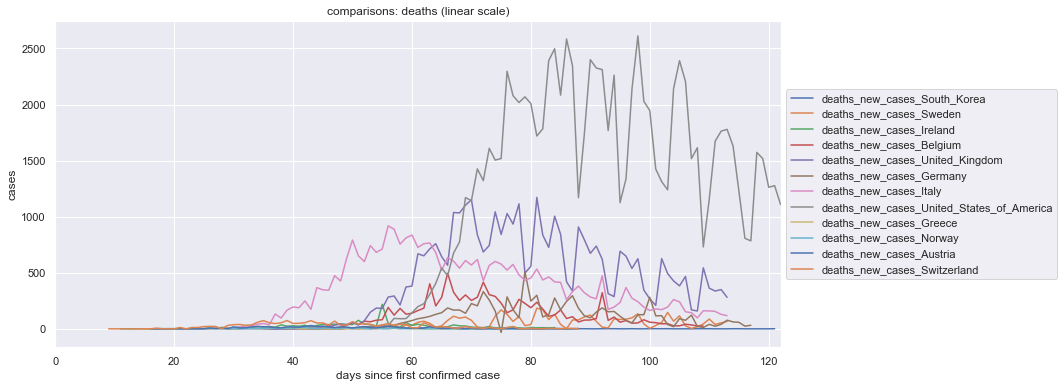

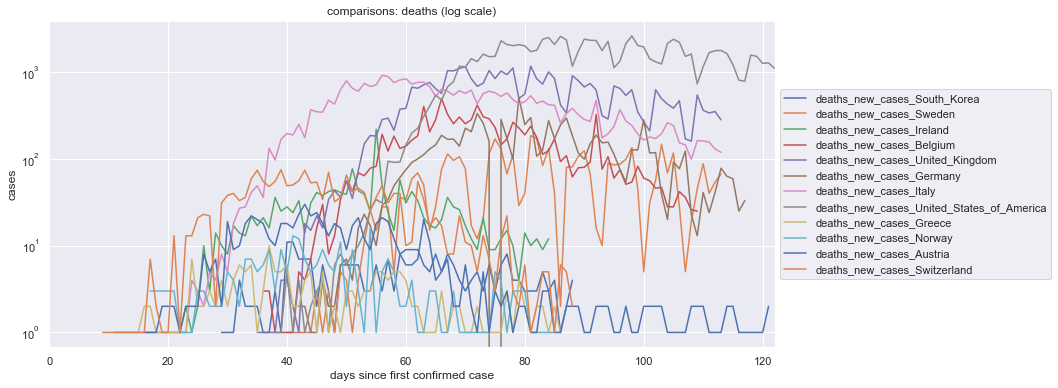

In [28]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
118                      NaN                       NaN   
119                      NaN                       NaN   
120                      NaN                       NaN   
121                      NaN                       NaN   
122                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
118                       NaN                              NaN   
119                       NaN                              NaN   
120                       NaN                              NaN   
121                       NaN                              NaN   
122                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
118                       NaN                     NaN   
119                       NaN                     NaN   
120                       NaN                     NaN   
121                       NaN                     NaN   
122                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
118                      NaN                      NaN   
119                      NaN                      NaN   
120                      NaN                      NaN   
121                      NaN                      NaN   
122                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
118                       NaN                           NaN  
119                       NaN                           NaN  
120                       NaN                           NaN  
121                       NaN                           NaN  
122                       NaN                           NaN

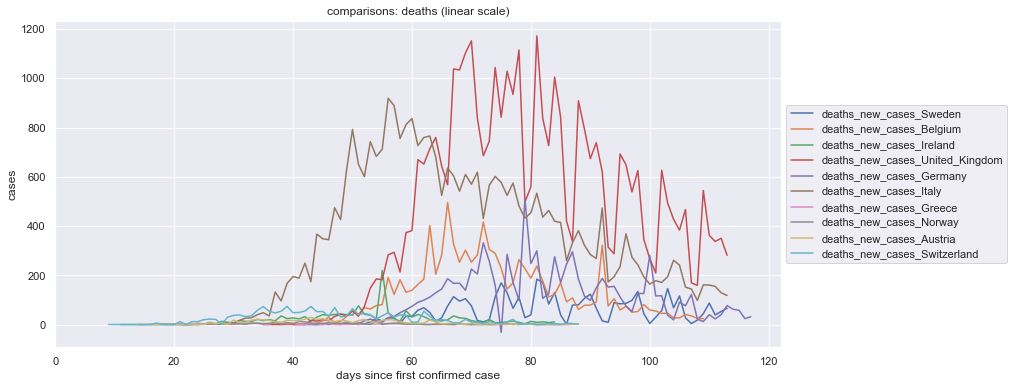

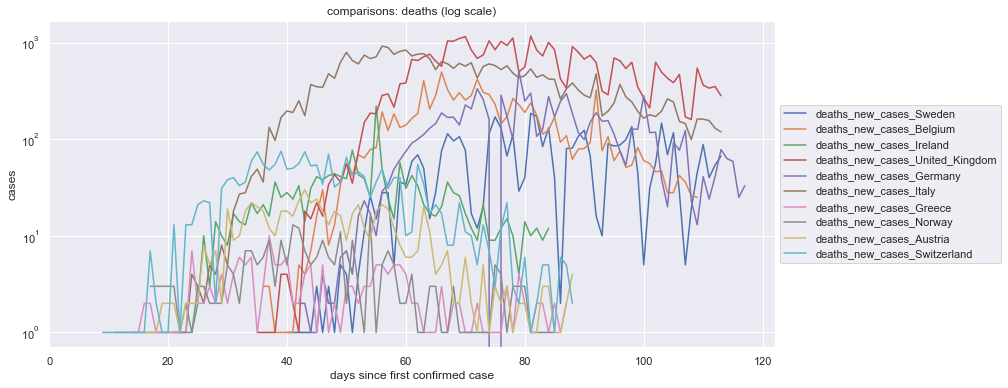

In [29]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
118                                 0.288861   
119                                 0.108011   
120                                 0.179824   
121                                 0.206426   
122                                 0.223914   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
118                                 NaN                                  NaN   
119                                 NaN                                  NaN   
120                                 NaN                                  NaN   
121                                 NaN                                  NaN   
122                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
118                                  NaN   
119                                  NaN   
120                                  NaN   
121                                  NaN   
122                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
118                                         NaN   
119                                         NaN   
120                                         NaN   
121                                         NaN   
122                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
118                                  NaN                                NaN   
119                                  NaN                                NaN   
120                                  NaN                                NaN   
121                                  NaN                                NaN   
122                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
118                                           1.343227      
119                                           1.523321      
120                                           1.629922      
121                                           1.508420      
122                                           1.353895      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
118                                 NaN                                 NaN   
119                                 NaN                                 NaN   
120                                 NaN                                 NaN   
121                                 NaN                                 NaN   
122                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
118                                  NaN   
119                                  NaN   
120                                  NaN   
121                                  NaN   
122                                  NaN   

     confirmed_percentage_change_Switzerland  
118                                      NaN  
119                                      NaN  
120                                      NaN  
121                                      NaN  
122                                      NaN

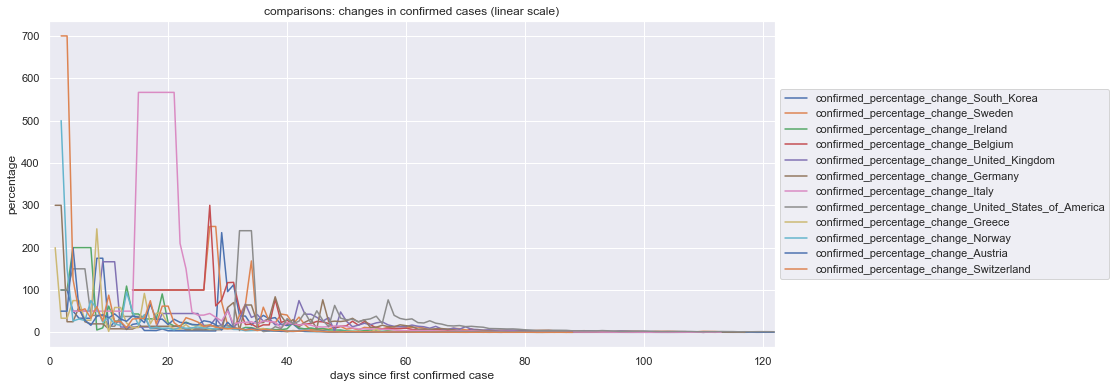

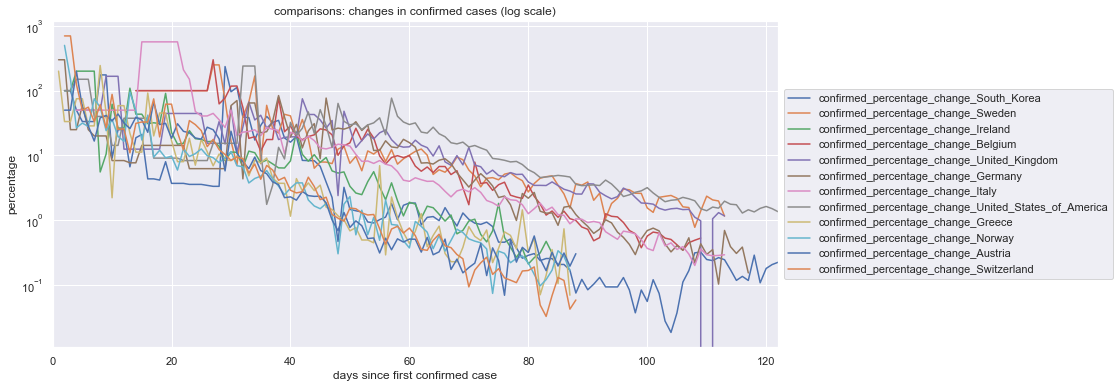

In [30]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
118                              0.380228                              NaN   
119                              0.380228                              NaN   
120                              0.380228                              NaN   
121                              0.757576                              NaN   
122                                   NaN                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
118                               NaN                               NaN   
119                               NaN                               NaN   
120                               NaN                               NaN   
121                               NaN                               NaN   
122                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
118                                      NaN   
119                                      NaN   
120                                      NaN   
121                                      NaN   
122                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
118                               NaN                             NaN   
119                               NaN                             NaN   
120                               NaN                             NaN   
121                               NaN                             NaN   
122                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
118                                           1.742172   
119                                           1.651418   
120                                           1.351684   
121                                           1.348440   
122                                           1.154419   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
118                              NaN                              NaN   
119                              NaN                              NaN   
120                              NaN                              NaN   
121                              NaN                              NaN   
122                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
118                               NaN                                   NaN  
119                               NaN                                   NaN  
120                               NaN                                   NaN  
121                               NaN                                   NaN  
122                               NaN                                   NaN

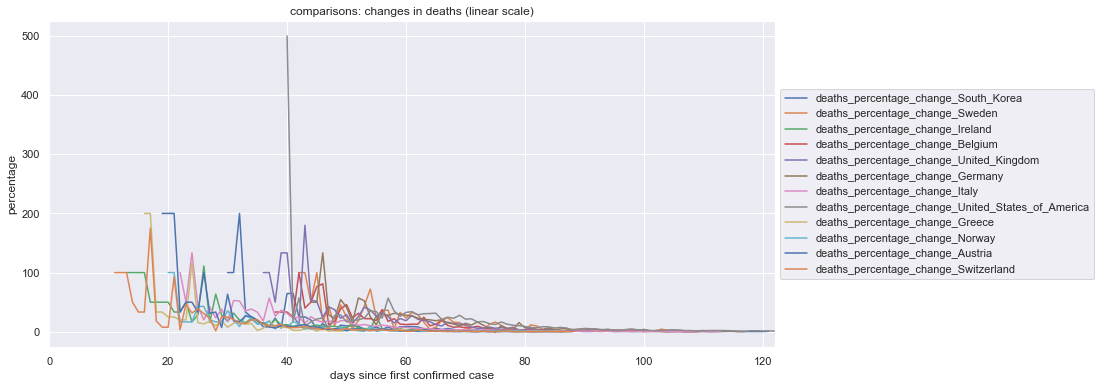

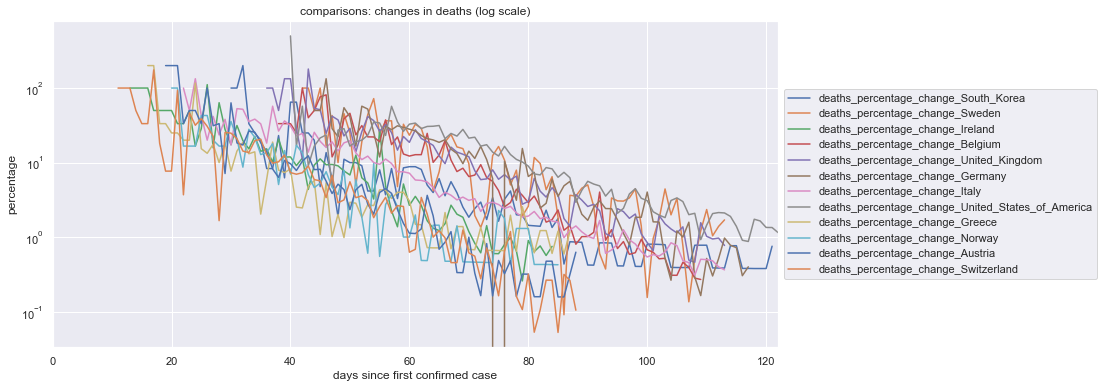

In [31]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
118                              NaN                               NaN   
119                              NaN                               NaN   
120                              NaN                               NaN   
121                              NaN                               NaN   
122                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
118                               NaN   
119                               NaN   
120                               NaN   
121                               NaN   
122                               NaN   

     deaths_percentage_change_United_Kingdom  \
118                                      NaN   
119                                      NaN   
120                                      NaN   
121                                      NaN   
122                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
118                               NaN                             NaN   
119                               NaN                             NaN   
120                               NaN                             NaN   
121                               NaN                             NaN   
122                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
118                              NaN                              NaN   
119                              NaN                              NaN   
120                              NaN                              NaN   
121                              NaN                              NaN   
122                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
118                               NaN                                   NaN  
119                               NaN                                   NaN  
120                               NaN                                   NaN  
121                               NaN                                   NaN  
122                               NaN                                   NaN

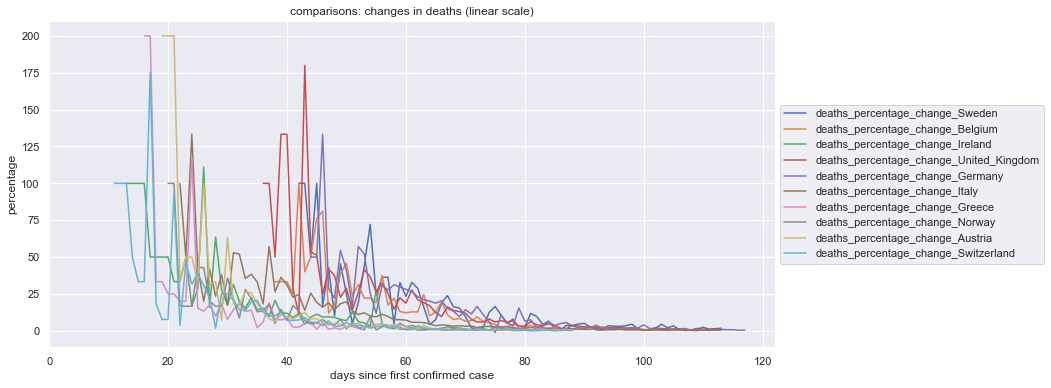

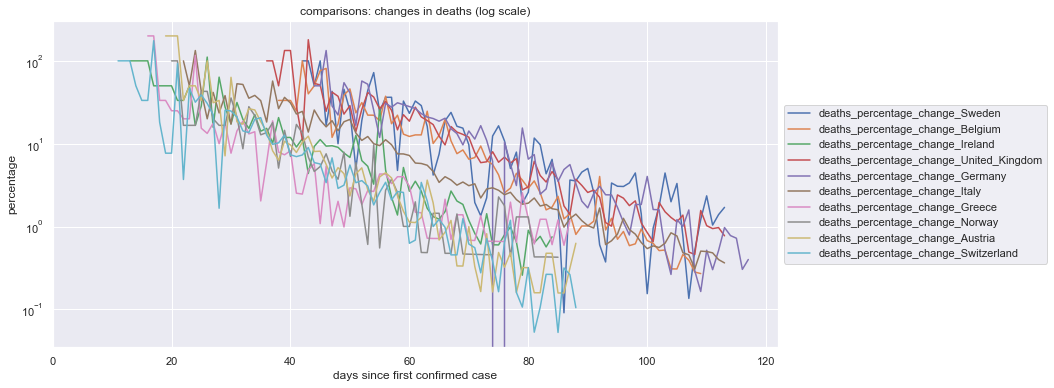

In [32]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');